# Exploratory Data Analysis

In this seminar our main objective is to cover how to:
1. Read and examine a dataset and classify variables by their type
2. Handle categorical variables with numerically coded values
3. Perform univariate and bivariate graphical and non-graphical analysis and derive meaningful insights about the data
4. Identify and treat missing values and remove dataset outliers
5. Build a correlation matrix to identify relevant variables
6. Get comfortable working with pandas, matplotlib, seaborn, plotly and numpy
7. Take a look at two datasets: Titanic and Movielens


## Why do we need it?

Here are the main reasons we use EDA:
* detection of mistakes in the data
* checking of assumptions, coming up with hypotheses
* preliminary selection of appropriate models
* determining relationships among the explanatory variables
* assessing the direction and rough size of relationships between explanatory
and outcome variables.

## Types of EDA


* non-graphical: generally involves calculation of summary statistics
* graphical: summarize the data in a diagrammatic or pictorial way
* univariate: look at one variable (data column) at a time
* multivariate (usually just bivariate): look at two or more variables at a time to explore relationships
* based on the role and type of the variable(s) being examined: outcome or explanatory, categorical or quantitative


## Variables by role

* outcome variables (dependent variable, **target**)
* **explanatory** variable (independent variable, covariate, predictor variable)
* **moderator** variable (secondary explanatory variable)
* **intermediate** variable in a causal chain of variables, mediator


## Variables by type

* Quantitative
* Discrete
* Continuous
* Categorical
* Nominal
* Ordinal


**Quantitative variables** are those for which the recorded numbers encode magnitude information based on a true quantitative scale.

The best way to check if a measure is quantitative is to **use the subtraction test**. If two experimental units (e.g., two people) have different values for a particular measure, then you should subtract the two values, and ask yourself about the meaning of the difference. If the difference can be interpreted as a quantitative measure of difference between the subjects, and if the meaning of each quantitative difference is the same for any pair of values with the same difference (e.g., 1 vs. 3 and 10 vs. 12), then this is a quantitative variable. Otherwise, it is a categorical variable.

For example, if the measure is age of the subjects in years, then for all of the pairs 15 vs. 20, 27 vs. 32, 62 vs. 67, etc., the difference of 5 indicates that the subject in the pair with the large value has lived 5 more years than the subject with the smaller value, and this is a quantitative variable. Other examples that meet the subtraction test for quantitative variables are age in months or seconds, weight in pounds or ounces or grams, length of index finger, number of jelly beans eaten in 5 minutes, number of siblings, and number of correct answers on an exam.


**Categorical**.

Examples that fail the subtraction test, and are therefore categorical, not quantitative, are eye color coded 1=blue, 2=brown, 3=gray, 4=green, 5=other; race where 1=Asian, 2=Black, 3=Caucasian, 4=Other; grade on an exam coded 4=A, 3=B, 2=C, 1=D, 0=F; type of car where 1=SUV, 2=sedan, 3=compact and 4=subcompact; and severity of burn where 1=first degree, 2=second degree, and 3=third degree. While the examples of eye color and race would only fool the most careless observer into incorrectly calling them quantitative, the latter three examples are trickier. For the coded letter grades, the average difference between an A and a B may be 5 correct questions, while the average difference between a B and a C may be 10 correct questions, so this is not a quantitative variable. (On the other hand, if we call the variable quality points, as is used in determining grade point average, it can be used as a quantitative variable.) Similar arguments apply for the car type and burn severity examples, e.g., the size or weight difference between SUV and sedan is not the same as between compact and subcompact.

**Discrete or continuous**

Once you have determined that a variable is quantitative, it is often worthwhile to further classify it into discrete (also called counting) vs. continuous. Here the test is the **midway test**. If, for every pair of values of a quantitative variable the value midway between them is a meaningful value, then the variable is continuous, otherwise it is discrete. Typically discrete variables can only take on whole numbers (but all whole numbered variables are not necessarily discrete). For example, age in years is continuous because midway between 21 and 22 is 21.5 which is a meaningful age, even if we operationalized age to be age at the last birthday or age at the nearest birthday. Other examples of continuous variables include weights, lengths, areas, times, and speeds of various kinds. Other examples of discrete variables include number of jelly beans eaten, number of siblings, number of correct questions on an exam,and number of incorrect turns a rat makes in a maze. For none of these does an answer of, say, 3 1 2 , make sense.

## Load Titanic dataset and have a first high-level look at it

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

%matplotlib inline

In [2]:
!pip install plotly

  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 35.4 MB/s eta 0:00:00a 0:00:01
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
# Source: https://www.kaggle.com/competitions/titanic/data
# titanic_train = pd.read_csv('drive/MyDrive/titanic/train.csv')

url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic_train = pd.read_csv(url)

In [5]:
def plot_dot(X, figsize=(25, 2.25)):
  values, counts = np.unique(X, return_counts=True)

  fig, ax = plt.subplots(figsize=figsize)
  for value, count in zip(values, counts):
      ax.plot([value]*count, list(range(count)), 'co', ms=10, linestyle='')
  for spine in ['top', 'right', 'left']:
      ax.spines[spine].set_visible(False)
  ax.yaxis.set_visible(False)
  ax.set_ylim(-1, max(counts))
  min_val, max_val = min(values), max(values)
  #if type(min_val) == np.float64 or type(max_val) == np.float64:
  #  min_val, max_val = round(min_val), round(max_val)
  ax.set_xticks(range(min_val, max_val+1))
  ax.tick_params(axis='x', length=0, pad=8, labelsize=12)

  plt.show()

| Variable | Meaning |
| --- | --- |
| survived | 0 = No, 1 = Yes |
| pclass | 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower) |
| sex | M (Male), F (Female) |
| age | Age in years, is fractional if less than 1 |
| sibsp | number of siblings / spouses aboard the Titanic |
| parch | number of parents / children aboard the Titanic |
| ticket | Ticket number |
| fare | Passenger fare |
| cabin |  Cabin number |
| embarked |   Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton |

In [6]:
titanic_train.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

#### **Pandas**

In [7]:
titanic_train.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [8]:
titanic_train.nunique()

survived      2
pclass        3
name        891
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [10]:
titanic_train.tail()

survived  pclass                                      name     sex   age  \
886         0       2                     Montvila, Rev. Juozas    male  27.0   
887         1       1              Graham, Miss. Margaret Edith  female  19.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
889         1       1                     Behr, Mr. Karl Howell    male  26.0   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     sibsp  parch      ticket   fare cabin embarked  
886      0      0      211536  13.00   NaN        S  
887      0      0      112053  30.00   B42        S  
888      1      2  W./C. 6607  23.45   NaN        S  
889      0      0      111369  30.00  C148        C  
890      0      0      370376   7.75   NaN        Q

In [11]:
titanic_train.age.iloc[-1]  # pandas -> pyspark

32.0

In [12]:
titanic_train.name.iloc[:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: name, dtype: object

In [13]:
titanic_train.name.loc[:10]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
Name: name, dtype: object

In [ ]:
titanic_train.iloc[:91, [2, 4]]

name   age
0                             Braund, Mr. Owen Harris  22.0
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                              Heikkinen, Miss. Laina  26.0
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4                            Allen, Mr. William Henry  35.0
..                                                ...   ...
86                             Ford, Mr. William Neal  16.0
87                      Slocovski, Mr. Selman Francis   NaN
88                         Fortune, Miss. Mabel Helen  23.0
89                             Celotti, Mr. Francesco  24.0
90                               Christmann, Mr. Emil  29.0

[91 rows x 2 columns]

In [15]:
titanic_train[(titanic_train.age <=1) & (titanic_train.sex == 'male') ]

survived  pclass                             name   sex   age  sibsp  \
78          1       2    Caldwell, Master. Alden Gates  male  0.83      0   
164         0       3     Panula, Master. Eino Viljami  male  1.00      4   
183         1       2        Becker, Master. Richard F  male  1.00      2   
305         1       1   Allison, Master. Hudson Trevor  male  0.92      1   
386         0       3  Goodwin, Master. Sidney Leonard  male  1.00      5   
755         1       2        Hamalainen, Master. Viljo  male  0.67      1   
788         1       3       Dean, Master. Bertram Vere  male  1.00      1   
803         1       3  Thomas, Master. Assad Alexander  male  0.42      0   
827         1       2            Mallet, Master. Andre  male  1.00      0   
831         1       2  Richards, Master. George Sibley  male  0.83      1   

     parch           ticket      fare    cabin embarked  
78       2           248738   29.0000      NaN        S  
164      1          3101295   39.6875      NaN        S  
183      1           230136   39.0000       F4        S  
305      2           113781  151.5500  C22 C26        S  
386      2          CA 2144   46.9000      NaN        S  
755      1           250649   14.5000      NaN        S  
788      2        C.A. 2315   20.5750      NaN        S  
803      1             2625    8.5167      NaN        C  
827      2  S.C./PARIS 2079   37.0042      NaN        C  
831      1            29106   18.7500      NaN        S

In [14]:
titanic_train[(titanic_train.age <=1) & (titanic_train.sex == 'female') ]

survived  pclass                           name     sex   age  sibsp  \
172         1       3   Johnson, Miss. Eleanor Ileen  female  1.00      1   
381         1       3    Nakid, Miss. Maria ("Mary")  female  1.00      0   
469         1       3  Baclini, Miss. Helene Barbara  female  0.75      2   
644         1       3         Baclini, Miss. Eugenie  female  0.75      2   

     parch  ticket     fare cabin embarked  
172      1  347742  11.1333   NaN        S  
381      2    2653  15.7417   NaN        C  
469      1    2666  19.2583   NaN        C  
644      1    2666  19.2583   NaN        C

In [ ]:
titanic_train.fare.min(), titanic_train.fare.max()

(0.0, 512.3292)

In [ ]:
max_relative_ind = (titanic_train.sibsp + titanic_train.parch).idxmax()
max_relative_ind, titanic_train.loc[max_relative_ind, 'name']

(159, 'Sage, Master. Thomas Henry')

In [ ]:
titanic_train.loc[159]

survived                             0
pclass                               3
name        Sage, Master. Thomas Henry
sex                               male
age                                NaN
sibsp                                8
parch                                2
ticket                        CA. 2343
fare                             69.55
cabin                              NaN
embarked                             S
Name: 159, dtype: object

In [ ]:
misters = titanic_train.name.map(lambda name: 'Mr. ' in name).sum()
missis = titanic_train.name.map(lambda name: 'Mrs. ' in name).sum()
pd.Series([misters, missis], index=['Mr. ', 'Mrs. '])

Mr.      517
Mrs.     125
dtype: int64

In [ ]:
titanic_train.name.apply(lambda name: 'Mr. ' in name)

0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: name, Length: 891, dtype: bool

In [ ]:
groupedn = titanic_train.groupby(['embarked', 'sex'])['sex'].size()  # split -> apply -> combine

In [ ]:
groupedn

embarked  sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: sex, dtype: int64

In [ ]:
groupedn.index[-5:]

MultiIndex([('C',   'male'),
            ('Q', 'female'),
            ('Q',   'male'),
            ('S', 'female'),
            ('S',   'male')],
           names=['embarked', 'sex'])

In [ ]:
groupedn['C']['male']

95

In [ ]:
for port, frame in titanic_train.groupby('embarked'):
  print(port)
  print('___')
  print(frame.head(2), end='\n\n')

C
___
   survived  pclass                                               name  \
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      sex   age  sibsp  parch    ticket     fare cabin embarked  
1  female  38.0      1      0  PC 17599  71.2833   C85        C  
9  female  14.0      1      0    237736  30.0708   NaN        C  

Q
___
    survived  pclass                  name   sex  age  sibsp  parch  ticket  \
5          0       3      Moran, Mr. James  male  NaN      0      0  330877   
16         0       3  Rice, Master. Eugene  male  2.0      4      1  382652   

       fare cabin embarked  
5    8.4583   NaN        Q  
16  29.1250   NaN        Q  

S
___
   survived  pclass                     name     sex   age  sibsp  parch  \
0         0       3  Braund, Mr. Owen Harris    male  22.0      1      0   
2         1       3   Heikkinen, Miss. Laina  female  26.0      0      0   

     

In [ ]:
titanic_train.groupby('embarked').get_group('C').head()

survived  pclass                                               name  \
1          1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
9          1       2                Nasser, Mrs. Nicholas (Adele Achem)   
19         1       3                            Masselmani, Mrs. Fatima   
26         0       3                            Emir, Mr. Farred Chehab   
30         0       1                           Uruchurtu, Don. Manuel E   

       sex   age  sibsp  parch    ticket     fare cabin embarked  
1   female  38.0      1      0  PC 17599  71.2833   C85        C  
9   female  14.0      1      0    237736  30.0708   NaN        C  
19  female   NaN      0      0      2649   7.2250   NaN        C  
26    male   NaN      0      0      2631   7.2250   NaN        C  
30    male  40.0      0      0  PC 17601  27.7208   NaN        C

In [ ]:
titanic_train.groupby('pclass')['fare'].max().sort_index(ascending=True)

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64

In [ ]:
titanic_train.drop('survived', axis=1).head()

pclass                                               name     sex   age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   sibsp  parch            ticket     fare cabin embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0      0            373450   8.0500   NaN        S

In [ ]:
titanic_train.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [ ]:
titanic_train.rename(columns={'parch':'dfifdhifd'})

survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  dfifdhifd            ticket     fare cabin embarked  
0      male  22.0      1          0         A/5 21171   7.2500   NaN        S  
1    female  38.0      1          0          PC 17599  71.2833   C85        C  
2    female  26.0      0          0  STON/O2. 3101282   7.9250   NaN        S  
3    female  35.0      1          0            113803  53.1000  C123        S  
4      male  35.0      0          0            373450   8.0500   NaN        S  
..      ...   ...    ...        ...               ...      ...   ...      ...  
886    male  27.0      0          0            211536  13.0000   NaN        S  
887  female  19.0      0          0            112053  30.0000   B42        S  
888  female   NaN      1          2        W./C. 6607  23.4500   NaN        S  
889    male  26.0      0          0            111369  30.0000  C148        C  
890    male  32.0      0          0            370376   7.7500   NaN        Q  

[891 rows x 11 columns]

In [ ]:
titanic_train.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [ ]:
titanic_train[titanic_train.embarked.isnull()]

survived  pclass                                       name     sex  \
61          1       1                        Icard, Miss. Amelie  female   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      age  sibsp  parch  ticket  fare cabin embarked  
61   38.0      0      0  113572  80.0   B28      NaN  
829  62.0      0      0  113572  80.0   B28      NaN

In [ ]:
pd.isnull

<function pandas.core.dtypes.missing.isna(obj: 'object') -> 'bool | npt.NDArray[np.bool_] | NDFrame'>

In [ ]:
tc = titanic_train.ticket.value_counts()

In [ ]:
titanic_train[titanic_train.ticket.isin(tc.index[tc.gt(6)])]

survived  pclass                                               name  \
13          0       3                        Andersson, Mr. Anders Johan   
74          1       3                                      Bing, Mr. Lee   
119         0       3                  Andersson, Miss. Ellis Anna Maria   
159         0       3                         Sage, Master. Thomas Henry   
169         0       3                                      Ling, Mr. Lee   
180         0       3                       Sage, Miss. Constance Gladys   
201         0       3                                Sage, Mr. Frederick   
324         0       3                           Sage, Mr. George John Jr   
509         1       3                                     Lang, Mr. Fang   
541         0       3               Andersson, Miss. Ingeborg Constanzia   
542         0       3                  Andersson, Miss. Sigrid Elisabeth   
610         0       3  Andersson, Mrs. Anders Johan (Alfrida Konstant...   
643         1       3                                    Foo, Mr. Choong   
692         1       3                                       Lam, Mr. Ali   
792         0       3                            Sage, Miss. Stella Anna   
813         0       3                 Andersson, Miss. Ebba Iris Alfrida   
826         0       3                                       Lam, Mr. Len   
838         1       3                                    Chip, Mr. Chang   
846         0       3                           Sage, Mr. Douglas Bullen   
850         0       3            Andersson, Master. Sigvard Harald Elias   
863         0       3                  Sage, Miss. Dorothy Edith "Dolly"   

        sex   age  sibsp  parch    ticket     fare cabin embarked  
13     male  39.0      1      5    347082  31.2750   NaN        S  
74     male  32.0      0      0      1601  56.4958   NaN        S  
119  female   2.0      4      2    347082  31.2750   NaN        S  
159    male   NaN      8      2  CA. 2343  69.5500   NaN        S  
169    male  28.0      0      0      1601  56.4958   NaN        S  
180  female   NaN      8      2  CA. 2343  69.5500   NaN        S  
201    male   NaN      8      2  CA. 2343  69.5500   NaN        S  
324    male   NaN      8      2  CA. 2343  69.5500   NaN        S  
509    male  26.0      0      0      1601  56.4958   NaN        S  
541  female   9.0      4      2    347082  31.2750   NaN        S  
542  female  11.0      4      2    347082  31.2750   NaN        S  
610  female  39.0      1      5    347082  31.2750   NaN        S  
643    male   NaN      0      0      1601  56.4958   NaN        S  
692    male   NaN      0      0      1601  56.4958   NaN        S  
792  female   NaN      8      2  CA. 2343  69.5500   NaN        S  
813  female   6.0      4      2    347082  31.2750   NaN        S  
826    male   NaN      0      0      1601  56.4958   NaN        S  
838    male  32.0      0      0      1601  56.4958   NaN        S  
846    male   NaN      8      2  CA. 2343  69.5500   NaN        S  
850    male   4.0      4      2    347082  31.2750   NaN        S  
863  female   NaN      8      2  CA. 2343  69.5500   NaN        S

In [ ]:
tc.index[tc.gt(6)]

Index(['347082', 'CA. 2343', '1601'], dtype='object')

In [ ]:
titanic_train.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
titanic_train[titanic_train.cabin.isnull()]

survived  pclass                                      name     sex   age  \
0           0       3                   Braund, Mr. Owen Harris    male  22.0   
2           1       3                    Heikkinen, Miss. Laina  female  26.0   
4           0       3                  Allen, Mr. William Henry    male  35.0   
5           0       3                          Moran, Mr. James    male   NaN   
7           0       3            Palsson, Master. Gosta Leonard    male   2.0   
..        ...     ...                                       ...     ...   ...   
884         0       3                    Sutehall, Mr. Henry Jr    male  25.0   
885         0       3      Rice, Mrs. William (Margaret Norton)  female  39.0   
886         0       2                     Montvila, Rev. Juozas    male  27.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     sibsp  parch            ticket     fare cabin embarked  
0        1      0         A/5 21171   7.2500   NaN        S  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  
4        0      0            373450   8.0500   NaN        S  
5        0      0            330877   8.4583   NaN        Q  
7        3      1            349909  21.0750   NaN        S  
..     ...    ...               ...      ...   ...      ...  
884      0      0   SOTON/OQ 392076   7.0500   NaN        S  
885      0      5            382652  29.1250   NaN        Q  
886      0      0            211536  13.0000   NaN        S  
888      1      2        W./C. 6607  23.4500   NaN        S  
890      0      0            370376   7.7500   NaN        Q  

[687 rows x 11 columns]

In [ ]:
a  = titanic_train.age.values
a.shape

(891,)

In [ ]:
np.arange(2,10).reshape(2,4).shape

(2, 4)

In [ ]:
np.arange(2,10).reshape(2,4)

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

[Source](https://sparkbyexamples.com/pandas/pandas-difference-between-loc-vs-iloc-in-dataframe/#:~:text=The%20main%20difference%20between%20pandas,it%20gives%20an%20index%20error.)
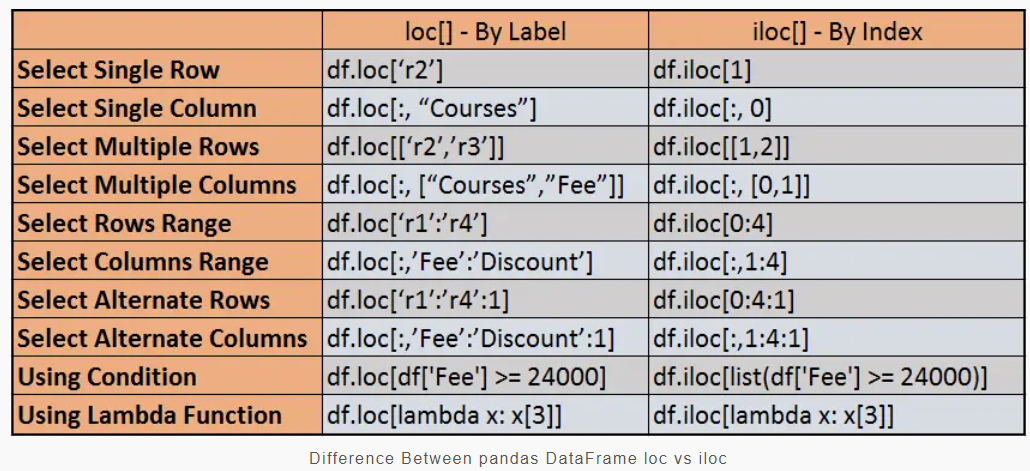

**Pandas supported types**

'b'       boolean

'i'       (signed) integer

'u'       unsigned integer

'f'       floating-point

'c'       complex-floating point

'O'       (Python) objects

'S', 'a'  (byte-)string

'U'       Unicode

'V'       raw data (void)

### **Numpy**

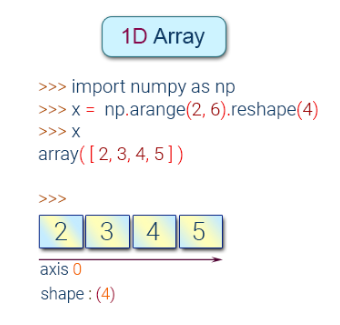

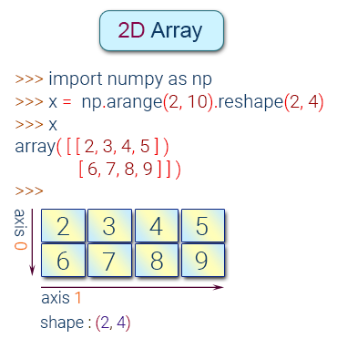

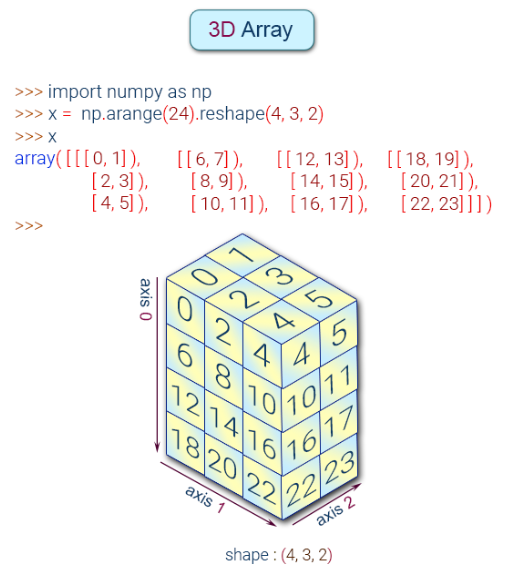

1. Matrix and array creation and generation. DTypes.
2. Reshaping. Shape, rank and dim.
3. Indexing and slicing
4. Broadcasting
5. Min, max, mean, argmin, exp, cos, dot, sum, matmul and other useful functions


In [ ]:
%%timeit
list(range(5_000_000))

332 ms ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
list(np.arange(5_000_000))

402 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
a = titanic_train.age.values

In [ ]:
type(a)

numpy.ndarray

In [ ]:
np.arange(2,10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(2,10).reshape(2,4)

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [ ]:
np.arange(2,10).reshape(8,1).shape

(8, 1)

In [ ]:
a.shape

(891,)

In [ ]:
a.reshape(9, 3, -1).shape   # 3,

(9, 3, 33)

In [ ]:
np.arange(24).reshape(4,2,3)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

In [ ]:
x = np.array([1,2,3])
x.shape, x[np.newaxis, :].shape

((3,), (1, 3))

In [ ]:
x

array([1, 2, 3])

In [ ]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [ ]:
np.array(['3', 3,4,6, 'fdjff', False, 1.6])

array(['3', '3', '4', '6', 'fdjff', 'False', '1.6'], dtype='<U32')

In [ ]:
np.array([2,3, 'df']).sum()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> None

In [ ]:
a.ndim

1

In [ ]:
a.shape

(891,)

In [ ]:
mymatrix = np.array([[1,2,3], [3,4,5], [7,8,9]])

In [ ]:
mymatrix.shape

(3, 3)

In [ ]:
mymatrix.ndim

2

In [ ]:
mymatrix[0][-1]

3

In [ ]:
x = np.array(range(10))

In [ ]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[-3:3:-1]

array([7, 6, 5, 4])

In [ ]:
x[np.array([3, 3, 1, -1])]

array([3, 3, 1, 9])

In [ ]:
y = np.arange(35).reshape(5, 7)
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [ ]:
y[np.array([0, 2, 1]), np.array([-1, -2, -3])]

array([ 6, 19, 11])

In [ ]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
x[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [ ]:
# broadcasting

In [ ]:
y

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [ ]:
y[np.array([0,2,4]), 1]

array([ 1, 15, 29])

In [ ]:
x = np.array([[1., 2.], [np.nan, 3.]])
x

array([[ 1.,  2.],
       [nan,  3.]])

In [ ]:
x[x>1]

array([2., 3.])

In [ ]:
x[~np.isnan(x)]

array([1., 2., 3.])

In [ ]:
np.isnan(x)

array([[False, False],
       [ True, False]])

In [ ]:
x = np.array([1,-1,-2,3])
x[x<0] += 20
x

array([ 1, 19, 18,  3])

In [ ]:
np.array([0, 2]) + 20

array([20, 22])

In [ ]:
a = np.array([1,2,3])
M = np.ones((3,3))
a, M

(array([1, 2, 3]),
 array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]))

In [ ]:
t = M[0] + a

In [ ]:
t

array([2., 4., 6.])

In [ ]:
M[0] = t

In [ ]:
M[0, :] += a

In [ ]:
M

array([[3., 6., 9.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
a,b

(array([0, 1, 2]),
 array([[0],
        [1],
        [2]]))

In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [ ]:
 0 1 2
 0 1 2
 0 1 2

 0 0 0
 1 1 1
 2 2 2

In [ ]:
X = np.random.random((10, 3))
X_mean = X.mean(0)
X, X_mean

(array([[0.55204718, 0.43612653, 0.29446576],
        [0.94845331, 0.76360579, 0.14011318],
        [0.86846798, 0.4874312 , 0.89455223],
        [0.79985526, 0.4252135 , 0.02246931],
        [0.26867736, 0.54163421, 0.63347822],
        [0.25788769, 0.13935607, 0.83493024],
        [0.98440218, 0.52569018, 0.17167929],
        [0.27230733, 0.01839068, 0.91429881],
        [0.11775108, 0.57651648, 0.27405522],
        [0.554178  , 0.65142039, 0.8297418 ]]),
 array([0.56240274, 0.4565385 , 0.5009784 ]))

In [ ]:
X_centered = X- X_mean

In [ ]:
X_centered

array([[-0.01035555, -0.02041197, -0.20651264],
       [ 0.38605057,  0.30706729, -0.36086523],
       [ 0.30606524,  0.03089269,  0.39357382],
       [ 0.23745252, -0.031325  , -0.4785091 ],
       [-0.29372538,  0.08509571,  0.13249982],
       [-0.30451505, -0.31718243,  0.33395183],
       [ 0.42199944,  0.06915168, -0.32929912],
       [-0.29009541, -0.43814783,  0.4133204 ],
       [-0.44465165,  0.11997797, -0.22692318],
       [-0.00822473,  0.19488188,  0.3287634 ]])

In [ ]:
X_centered.mean(0)

array([ 7.77156117e-17, -1.11022302e-17,  2.22044605e-17])

In [ ]:
x = np.array([1,2,3,4])
x<3

array([ True,  True, False, False])

In [ ]:
(2 * x) == (x ** 2)

array([False,  True, False, False])

In [ ]:
np.count_nonzero(x<3)

2

In [ ]:
np.sum(x<3)

2

In [ ]:
x = np.arange(0,20).reshape((2,10))
x, x<2,

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]),
 array([[ True,  True, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False]]))

In [ ]:
np.sum(x<2, axis=1)

array([2, 0])

In [ ]:
np.any(x>80, axis=1)

array([False, False])

In [ ]:
np.sum( ~((x<=10) | (x>=20)) )

9

In [ ]:
np.random.rand(3)

array([0.20642127, 0.01099583, 0.13688563])

In [ ]:
np.random.randn(3)   # ??????????????

array([ 1.62053345,  1.57049464, -1.00375789])

If positive int_like arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. A single float randomly sampled from the distribution is returned if no argument is provided.

In [ ]:
np.random.randint(2, 100, size=(3,3))

array([[18, 27, 86],
       [93, 63, 47],
       [65,  3, 55]])

In [ ]:
np.random.normal(0,1,(3,3))

array([[ 0.51029639, -0.34801309,  0.19855836],
       [-1.43436497,  0.58102201, -1.52401524],
       [-0.79843905,  1.34131192, -0.88377779]])

In [ ]:
np.empty(3)

array([1.62053345, 1.57049464, 1.00375789])

In [ ]:
x = np.array([5,1,1,5,6])
np.divide(x, x**2)

array([30,  2,  2, 30, 42])

In [ ]:
f = np.array([1,2])
g = np.array([4,5])   # 1*4 + 2*5
np.dot(f, g)

14

In [ ]:
np.ones((5,5), dtype=int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [ ]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [ ]:
a = np.arange(0,11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
sa = a[0:5]
sa

array([0, 1, 2, 3, 4])

In [ ]:
sa[:]  = 999

In [ ]:
sa

array([999, 999, 999, 999, 999])

In [ ]:
a

array([999, 999, 999, 999, 999,   5,   6,   7,   8,   9,  10])

In [ ]:
a2 = a.copy()

In [ ]:
x = np.random.randint(10, size=6)

In [ ]:
x

array([6, 7, 2, 5, 1, 6])

In [ ]:
x[0] = 3.14444

In [ ]:
x

array([3, 7, 2, 5, 1, 6])

In [ ]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[5::-2]

array([5, 3, 1])

In [ ]:
x2 = np.random.randint(10, size=(3,4))

In [ ]:
x2

array([[7, 5, 5, 4],
       [7, 0, 9, 3],
       [3, 2, 2, 3]])

In [ ]:
x2[::-1, ::-1]

array([[3, 2, 2, 3],
       [3, 9, 0, 7],
       [4, 5, 5, 7]])

In [ ]:
x2.T

array([[7, 7, 3],
       [5, 0, 2],
       [5, 9, 2],
       [4, 3, 3]])

In [ ]:
x, x.T

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
np.matmul(h, i)

In [ ]:
x2.flatten()

array([7, 5, 5, 4, 7, 0, 9, 3, 3, 2, 2, 3])

In [ ]:
np.concatenate([x, x, x, x])

In [ ]:
x = [1,2,3,4,5,6,7,8]
np.split(x, [3,5])

[array([1, 2, 3]), array([4, 5]), array([6, 7, 8])]

In [ ]:
.vsplit()
.hsplit()

In [ ]:
x = [20, 40, 1,2,3,4,5,6,7,8]
inds = np.argsort(x)

In [ ]:
inds

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [ ]:
np.array(x)[inds]

array([ 1,  2,  3,  4,  5,  6,  7,  8, 20, 40])

In [ ]:
sort(x, axis = 0)

| Data type| Description |
    |---------------|-------------|
    | ``bool_``     | Boolean (True or False) stored as a byte |
    | ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)|
    | ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)|
    | ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)|
    | ``int8``      | Byte (-128 to 127)|
    | ``int16``     | Integer (-32768 to 32767)|
    | ``int32``     | Integer (-2147483648 to 2147483647)|
    | ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)|
    | ``uint8``     | Unsigned integer (0 to 255)|
    | ``uint16``    | Unsigned integer (0 to 65535)|
    | ``uint32``    | Unsigned integer (0 to 4294967295)|
    | ``uint64``    | Unsigned integer (0 to 18446744073709551615)|
    | ``float_``    | Shorthand for ``float64``.|
    | ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa|
    | ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa|
    | ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa|
    | ``complex_``  | Shorthand for ``complex128``.|
    | ``complex64`` | Complex number, represented by two 32-bit floats|
    | ``complex128``| Complex number, represented by two 64-bit floats|

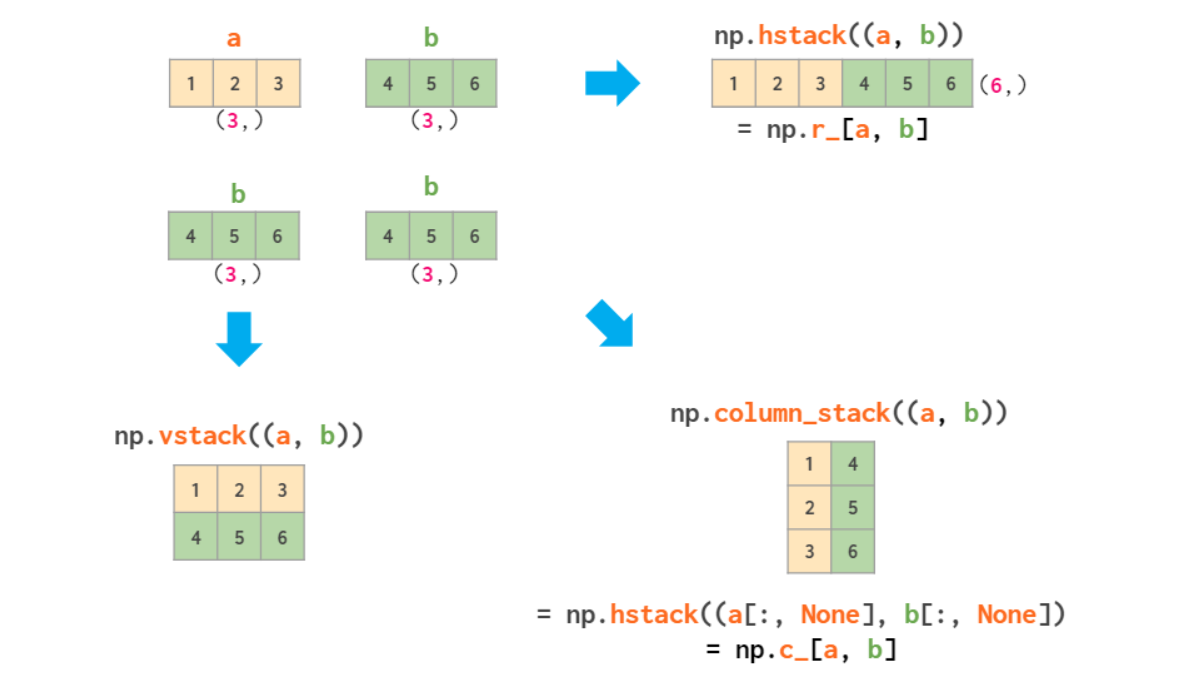

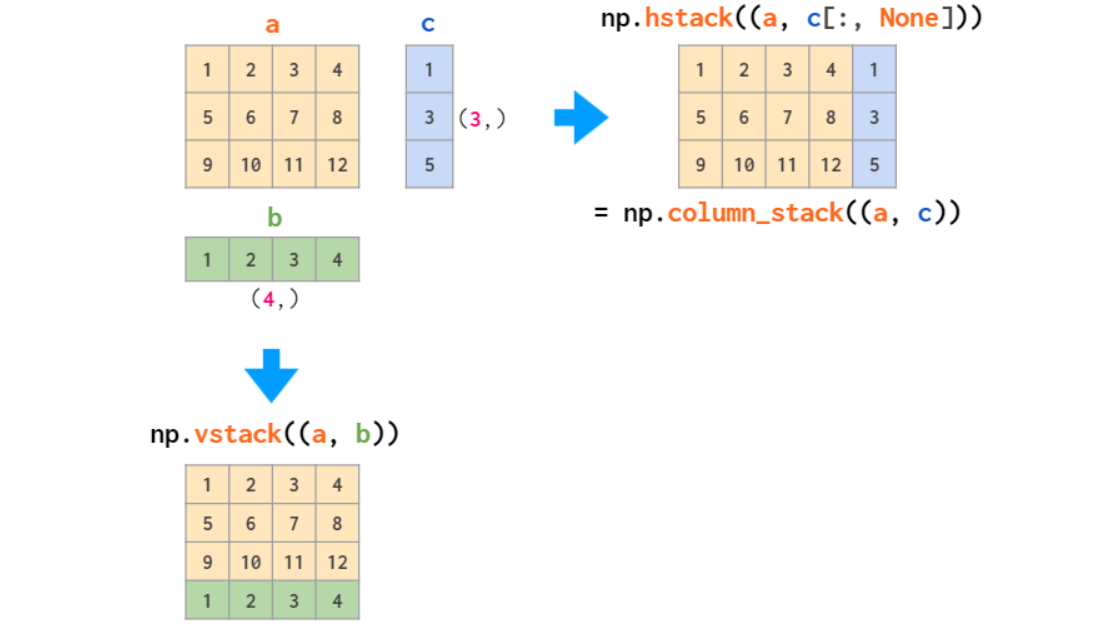

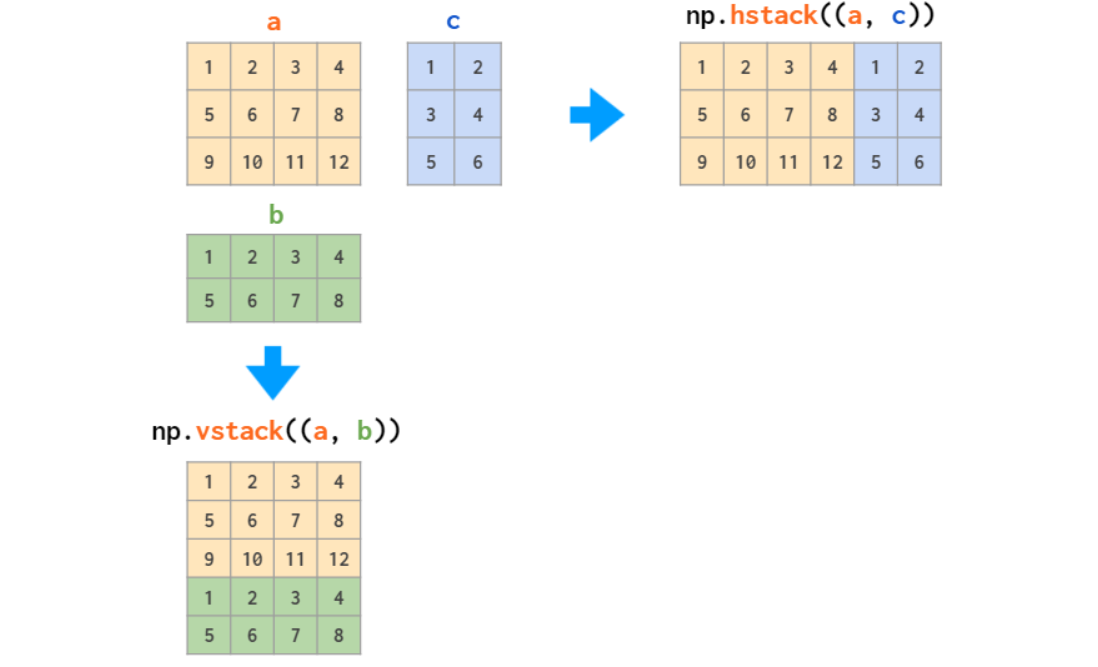

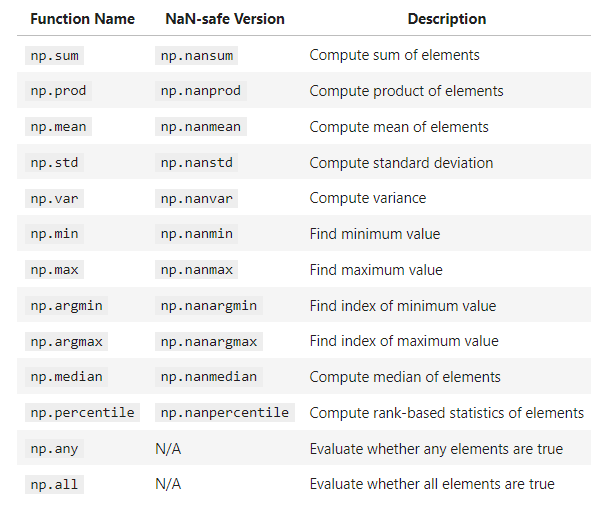

**Broadcasting**

Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

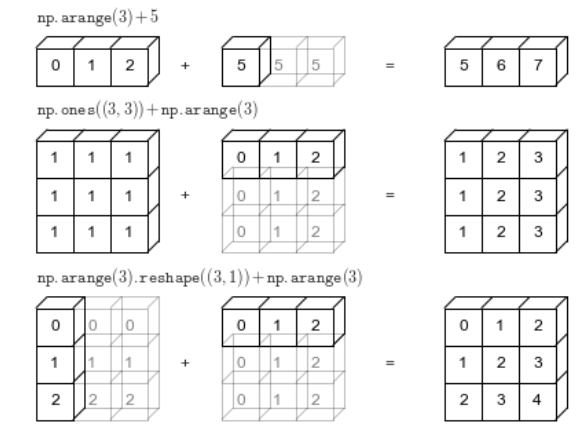

**Excercise 1**

1. Write code to generate following matrix

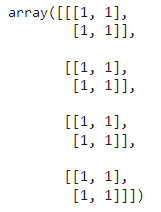

In [ ]:
np.ones((4, 2, 2), dtype='int')

array([[[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]],

       [[1, 1],
        [1, 1]]])

### **Excercise 2**

In [ ]:
# 2. Write code to generate the following matrix

#    0 5 5 5 5 5 0
#    5 1 1 1 1 1 5
#    5 1 0 0 0 1 5
#    5 1 0 9 0 1 5
#    5 1 0 0 0 1 5
#    5 1 1 1 1 1 5
#    0 5 5 5 5 5 0

In [ ]:
output = np.full((7,7), 5)
output

tmp1 = np.ones((5,5))
output[1:-1, 1:-1] = tmp1

tmp2 = np.zeros((3,3))
tmp2[1,1] = 9
output[2:-2, 2:-2] = tmp2

#output[0,0] =0
#output[0,-1] =0
#output[-1,0] =0
#output[-1,-1] =0

output[np.array([0,0,-1,-1]), np.array([0,-1,0,-1])] =0

output

array([[0, 5, 5, 5, 5, 5, 0],
       [5, 1, 1, 1, 1, 1, 5],
       [5, 1, 0, 0, 0, 1, 5],
       [5, 1, 0, 9, 0, 1, 5],
       [5, 1, 0, 0, 0, 1, 5],
       [5, 1, 1, 1, 1, 1, 5],
       [0, 5, 5, 5, 5, 5, 0]])

## Univariate non-graphical EDA

The data that come from making a particular measurement on all of the subjects in
a sample represent our observations for a single characteristic such as age, gender,
speed at a task, or response to a stimulus. We should think of these measurements
as representing a “**sample distribution**” of the variable, which in turn more or
less represents the “**population distribution**” of the variable. The usual goal of
univariate non-graphical EDA is to better appreciate the “sample distribution”
and also to make some tentative conclusions about what population distribution(s)
is/are compatible with the sample distribution. Outlier detection is also a part of
this analysis.

**Categorical data.**
The characteristics of interest for a categorical variable are simply the range of
values and the frequency (or relative frequency) of occurrence for each value. Therefore the only
useful univariate non-graphical techniques for categorical variables is some form of
tabulation of the frequencies, usually along with calculation of the fraction (or
percent) of data that falls in each category.

In [ ]:
titanic_train.sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: sex, dtype: float64

**Quantitative data.**
Univariate EDA for a quantitative variable is a way to make preliminary assessments about the population **distribution** of the variable
using the data of the observed sample.
The characteristics of the population distribution of a quantitative variable are its center, spread, modality, shape (including “heaviness of the tails”), and outliers. Our observed data represent just one sample out of an infinite number of possible samples. The characteristics of our randomly observed sample are not inherently interesting, except to the degree that they represent the population that it came from.
**Sample statistics**: sample **mean**, sample **variance**, sample **standard deviation**, sample **skewness** and sample **kurtosis**.
For quantitative variables (and possibly for ordinal variables) it is worthwhile
looking at the central tendency, spread, skewness, and kurtosis of the data for a particular variable from an experiment. But for categorical variables, none of these make any sense.

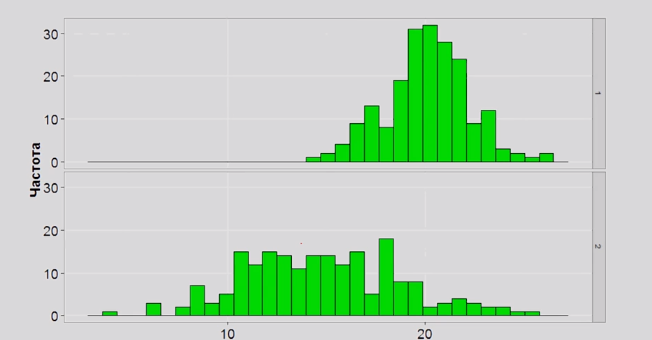

### Measures of central tendency

The central tendency or “location” of a distribution has to do with typical or
middle values. The common, useful measures of central tendency are the statistics called (arithmetic) mean, median, and sometimes mode. Occasionally other
means such as geometric, harmonic, truncated means are used as
measures of centrality.

#### **Sample mean**

Assuming that we have n data values labeled x1 through xn, the formula for
calculating the sample (arithmetic) mean is
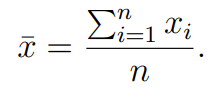
The arithmetic mean is simply the sum of all of the data values divided by the
number of values. It can be thought of as how much each subject gets in a “fair”
re-division of whatever the data are measuring. For instance, the mean amount
of money that a group of people have is the amount each would get if all of the
money were put in one “pot”, and then the money was redistributed to all people
evenly. It is **sensitive to anomalies**! The arithmetic mean also can be easily distorted for data that has a **non-Gaussian distribution** (e.g. multiple peaks, a so-called multi-modal probability distribution).

This statistic is useful when summarizing a variable, e.g. reporting the most likely value. This is more meaningful when a variable has a Gaussian or Gaussian-like data distribution.

In [ ]:
toy = [1,2,2,1,1,6]
np.mean(toy), np.median(toy)

(2.1666666666666665, 1.5)

In [ ]:
toy = [1,2,2,1,1,60]
np.mean(toy), np.median(toy)

(11.166666666666666, 1.5)

In [ ]:
toy = [1,1,1,1,1,1]
np.mean(toy)

1.0

**Other types of mean**

Weighted mean: some values contribute more to the mean than others.

Geometric mean: values are multiplied rather than summed up.

Harmonic mean: reciprocals of values are used instead of the values themselves.

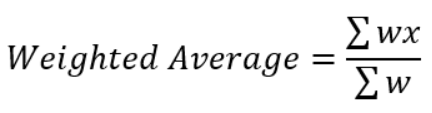

In [ ]:
toy_ds1 = [7, 6, 8, 5, 10]
weights = [0.2, 0.3, 0.1, 0.3, 0.1]

sum([i*j for i, j in zip(toy_ds1, weights)])/sum(weights)

6.500000000000001

In [ ]:
np.average(toy_ds1, weights=weights)

6.500000000000001

**Geometric mean**

[Википедия](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5)


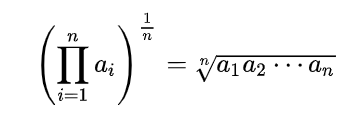

In [ ]:
toy_ds1 = np.array([7, 6])
toy_ds1.prod()**(1/len(toy_ds1))

6.48074069840786

In [ ]:
from functools import reduce
from operator import mul

reduce(mul, toy_ds1)**(1/len(toy_ds1))

6.48074069840786

**Harmonic mean**

[И снова википедия](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B3%D0%B0%D1%80%D0%BC%D0%BE%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5)

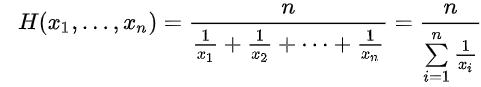

In [ ]:
import statistics

statistics.harmonic_mean([7, 6, 8, 5, 10])

6.807131280388979

In [ ]:
len([7, 6, 8, 5, 10])*(1/sum([1/n for n in [7, 6, 8, 5, 10]]))

In [ ]:
X = np.random.randint(0,10,10)
X, np.mean(X)

(array([0, 4, 2, 3, 2, 0, 0, 4, 5, 2]), 2.2)

In [ ]:
Z = X*2
Z, np.mean(Z)

(array([ 0,  8,  4,  6,  4,  0,  0,  8, 10,  4]), 4.4)

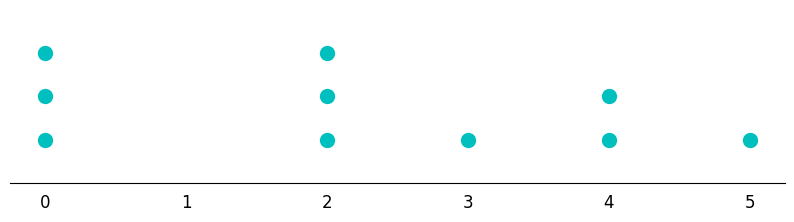

In [ ]:
plot_dot(X, figsize=(10,2.25))

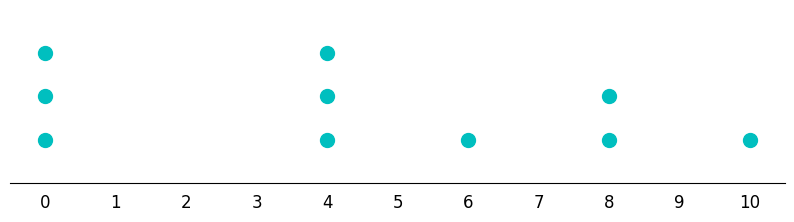

In [ ]:
plot_dot(Z, figsize=(10,2.25))

In [ ]:
sum(x-np.mean(X) for x in X)

-1.7763568394002505e-15

In [ ]:
a 3 4 1 5 7 1 2
b 6 8 2 10 14 2 4

#### **Median**

The sample median is the **middle value** after all of the values are put in an **ordered list**. If there are an
even number of values, take the average of the two middle values.

For **symmetric distributions**, the mean and the median coincide.

For **unimodal skewed** (**asymmetric**) distributions, the mean is farther in the direction of the “pulled out tail” of the distribution than the median is. Therefore, for many
cases of skewed distributions, the median is **preferred** as a measure of central tendency.

For *example*, according to the US Census Bureau 2004 Economic Survey,
the median income of US families, which represents the income above and below
which half of families fall, was 43,318. This seems a better measure of central
tendency than the mean of 60,828, which indicates how much each family would
have if we all shared equally.

The median has a very special property called **robustness**. A sample statistic
is “robust” if moving some data tends not to change the value of the statistic. The
median is highly robust, because you can move nearly all of the upper half and/or
lower half of the data values any distance away from the median without changing
the median. More practically, a few very high values or very low values usually
have no effect on the median.

#### **Mode**

A rarely used measure of central tendency is the mode, which is the most likely
or frequently occurring value. More commonly we simply use the term “mode”
when describing whether a distribution has a single peak (**unimodal**) or two or
more peaks (**bimodal** or **multi-modal**).

In **symmetric**, unimodal distributions, the
mode equals both the mean and the median.

In **unimodal**, **skewed** distributions
the mode is on the other side of the median from the mean.

In **multi-modal**
distributions there is either no unique highest mode, or the highest mode may well
be unrepresentative of the central tendency.

In [ ]:
X = [4, 1,1,11,4,5,6,1,4,4,1]
stats.mode(X)

ModeResult(mode=1, count=4)

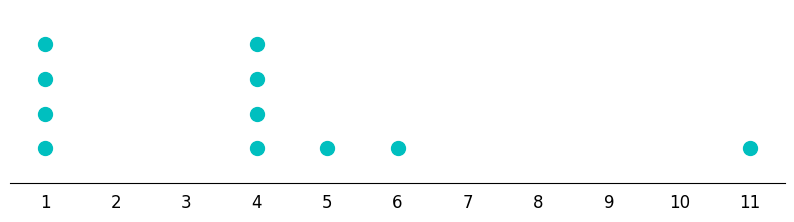

In [ ]:
plot_dot(X, figsize=(10,2.25))

In [ ]:
from statistics import mode
mode(X)

4

#### **Central measures of balanced and unblanced distribution (cont. and not)**


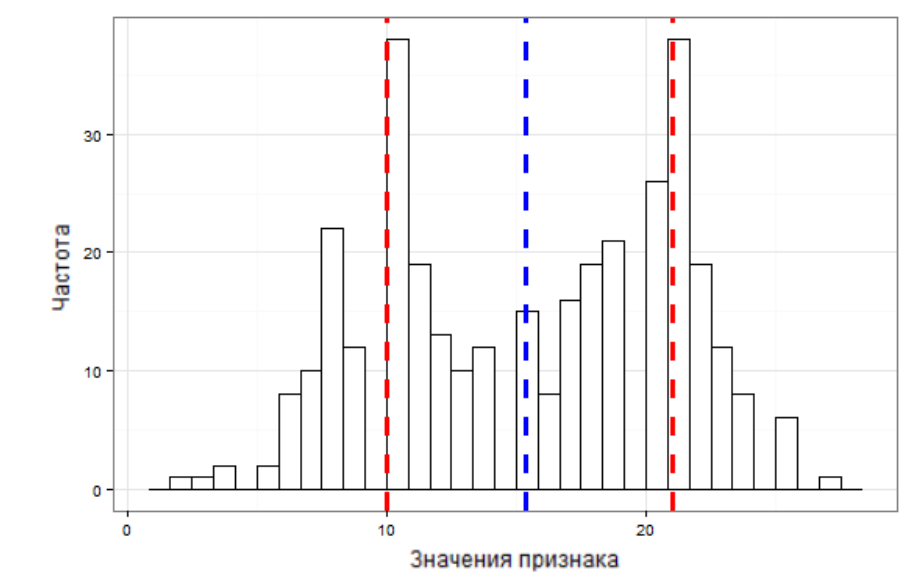

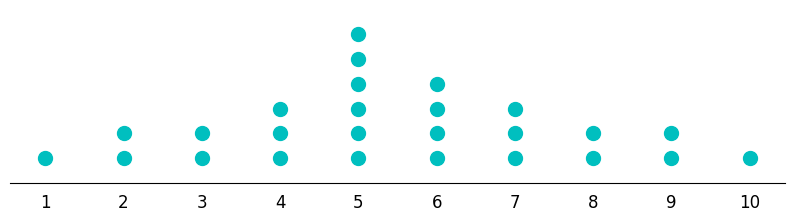

In [ ]:
X = [1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10]
plot_dot(X, figsize=(10, 2.25))

In [ ]:
np.mean(X), mode(X), np.median(X)

(5.461538461538462, 5, 5.0)

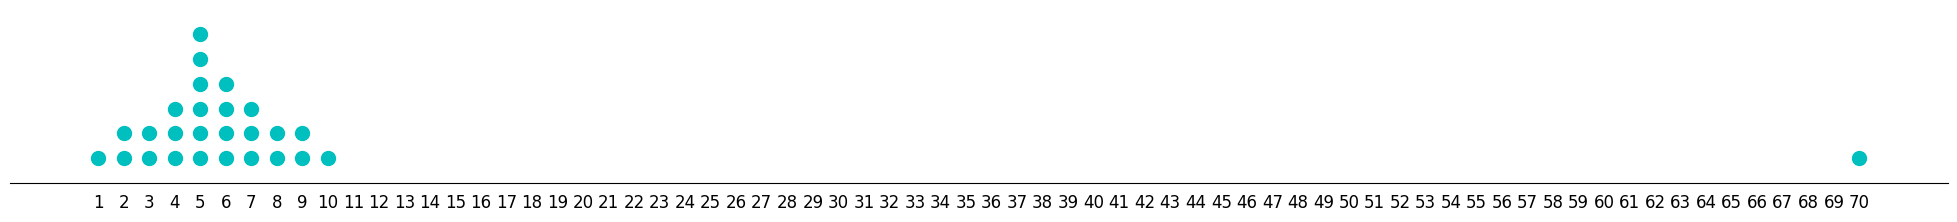

In [ ]:
X = [1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 70]
plot_dot(X, figsize=(25, 2.25))

In [ ]:
# Which measure will change more?
np.mean(X), mode(X), np.median(X)

(7.851851851851852, 5, 5.0)

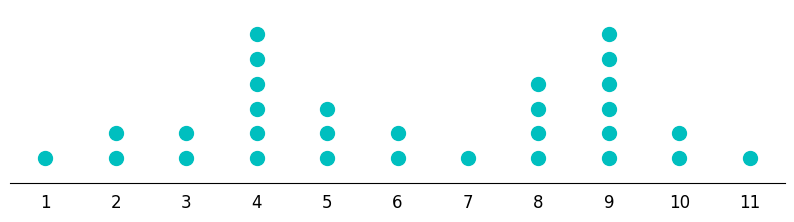

In [ ]:
X = [1, 2, 2, 3, 3, 4, 4, 4, 4, 4,4, 5, 5, 5, 6, 6, 7, 8, 8,8,8, 9, 9, 9,9,9,9,10,10, 11]
plot_dot(X, figsize=(10, 2.25))

In [ ]:
np.mean(X), mode(X), np.median(X)

(6.2, 4, 6.0)

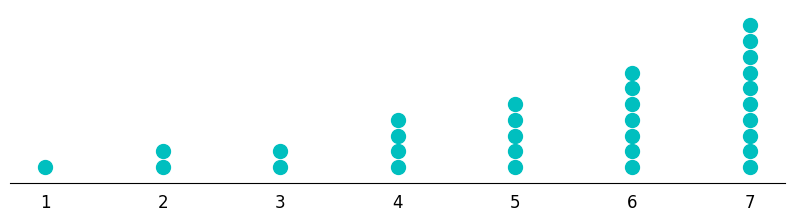

In [ ]:
X = [1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7]
plot_dot(X, figsize=(10, 2.25))

In [ ]:
np.mean(X), mode(X), np.median(X)

(5.290322580645161, 7, 6.0)

[Img source](https://stepik.org/lesson/8075/step/9?unit=1355)

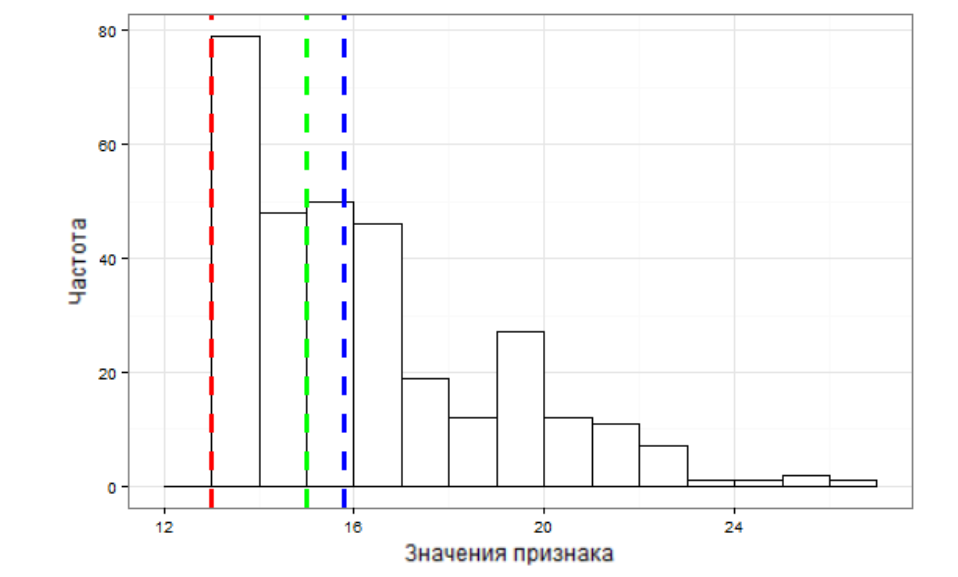


For any symmetrically shaped distribution (i.e., one with a symmetric histogram or probability density function) the mean is the point around which the symmetry holds.
For non-symmetric distributions, the mean is the “balance point”: if the histogram is cut out of some homogeneous stiff material such as cardboard, it will balance on a fulcrum placed at the mean.

-0.0018549111225888623 -0.001177583316158842


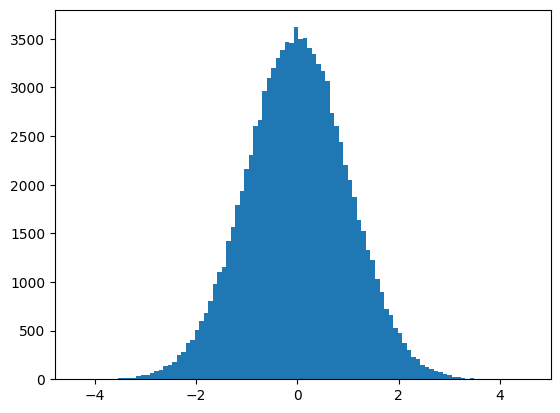

In [ ]:
rng = np.random.default_rng()
nd = rng.normal(size=100_000)
print(nd.mean(), np.median(nd))
plt.hist(nd, bins=100)
plt.show()

69.00007392603469 71.48517624657006


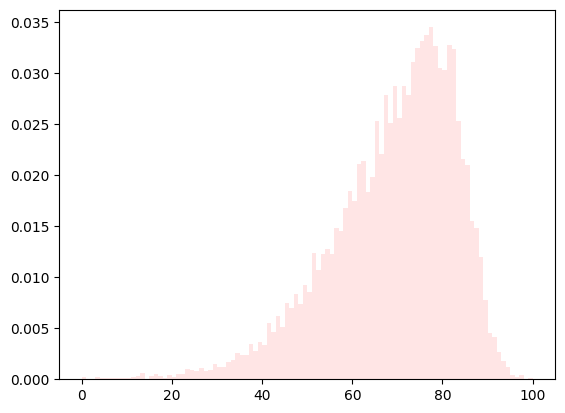

In [ ]:
from scipy.stats import skewnorm

numValues = 10000
maxValue = 100
skewness = -5   # Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness, loc=maxValue, size=numValues)

random = random - min(random)      # Shift the set so the minimum value is equal to zero.
random = random / max(random)      # Standadize all the vlues between 0 and 1.
random = random * maxValue         # Multiply the standardized values by the maximum value.

print(random.mean(),  np.median(random))
plt.hist(random, 100, density=True, color = 'red', alpha=0.1)
plt.show()

59.72805608010585 81.1903191309538


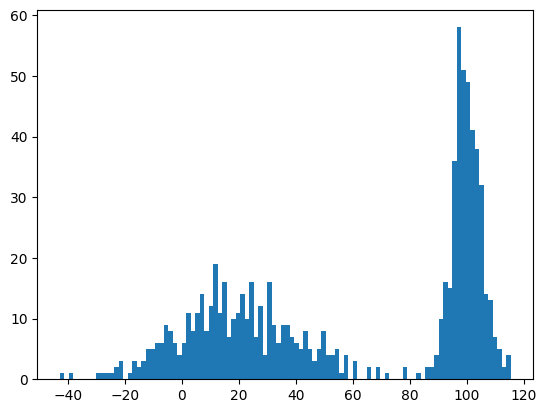

In [ ]:
N = 400
mu, sigma = 100, 5
mu2, sigma2 = 20, 20
X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
X = np.concatenate([X1, X2])
print(X.mean(), np.median(X))
plt.hist(X, bins=100)
plt.show()

When the peaks have unequal heights, the higher apex is the major mode, and the lower is the minor mode.

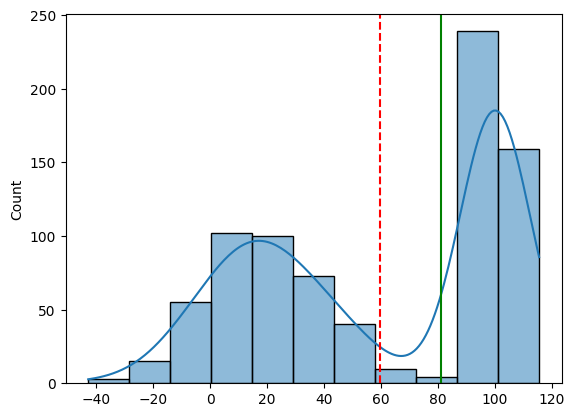

In [ ]:
sns.histplot(data=X, kde=True)
plt.axvline(X.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(np.median(X), color='g', linestyle='-', label="Median")

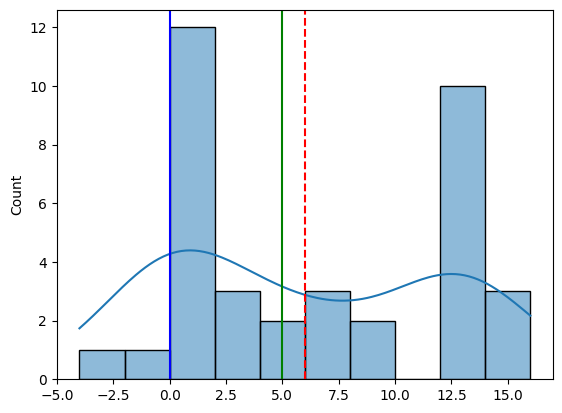

In [ ]:
temp = [-4,-2,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,5,5,6,6,7,8,9,12,12,12,12,13,13,13,13,13,13,14,15,16]
sns.histplot(data=temp, kde=True, bins=10)
plt.axvline(np.mean(temp), color='r', linestyle='--', label="Mean")
plt.axvline(np.median(temp), color='g', linestyle='-', label="Median")
plt.axvline(stats.mode(temp)[0], color='b', linestyle='-', label="Mode")

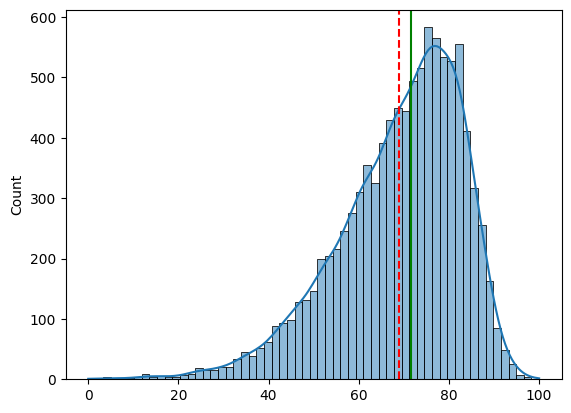

In [ ]:
sns.histplot(data=random, kde=True)
plt.axvline(random.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(np.median(random), color='g', linestyle='-', label="Median")

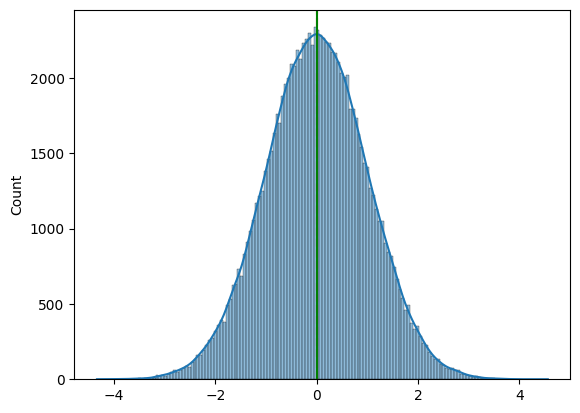

In [ ]:
sns.histplot(data=nd, kde=True)
plt.axvline(nd.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(np.median(nd), color='g', linestyle='-', label="Median")

### Lets handle missing values

**Definition**: no value is stored in a certain observation within a variable.

**Why Missing Data Matters?**
* certain algorithms cannot work when missing value are present
* even for algorithm that handle missing data, without treatment the model can lead to inaccurate conclusion

[Further reading](https://core.ecu.edu/krosj/IMDSDataMining2003.pdf)

**Missing Mechanisms**

It is important to understand the mechanisms by which missing fields are introduced in a dataset. Depending on the mechanism, we may choose to process the missing values differently.
* **Missing Completely at Random**: the probability of being missing is the same for all the observations. Absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.
If values for observations are missing completely at random, then disregarding those cases **would not bias** the inferences made.
* **Missing at Random**: there is a systematic relationship between the propensity of missing values and the observed data. In other words, the probability an observation being missing depends only
on available information (other variables in the dataset), but not on the variable itself.
For example, if men are more likely to disclose their weight than women, weight is MAR (on variable
gender). The weight information will be missing at random for those men and women that decided not to
disclose their weight, but as men are more prone to disclose it, there will be more missing values for women
than for men.
In a situation like the above, if we decide to proceed with the variable with missing values, we might benefit
from including gender to **control the bias** in weight for the missing observations.
* **Missing Not At Random - Depends on Unobserved Predictors**
Missingness depends on information that has not been recorded, and this information also predicts the
missing values. E.g., if a particular treatment causes discomfort, a patient is more likely to drop out of the
study (and 'discomfort' is not measured).
In this situation, data sample is **biased if we drop** those missing cases.
* **Missing Not At Random - Depends on Missing Value Itself**
Missingness depends on the (potentially missing) variable itself. E.g., people with higher earnings are less likely to reveal them.


*How do we know whether a variable is MCAR, MAR, MNAR??*

In [ ]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


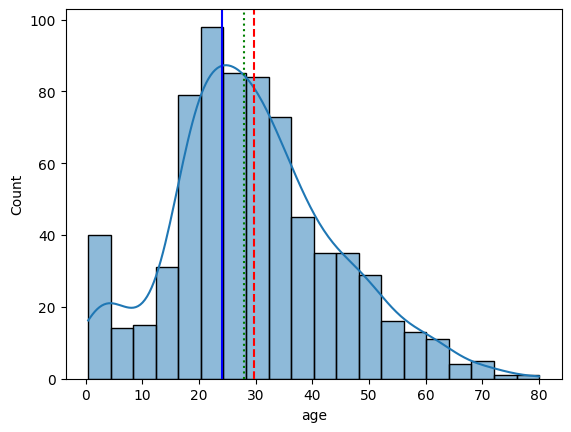

In [ ]:
sns.histplot(data=titanic_train.age, kde=True)
plt.axvline(titanic_train.age.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(titanic_train.age.median(), color='g', linestyle='dotted', label="Median")
plt.axvline(titanic_train.age.mode()[0], color='b', linestyle='-', label="Mode")

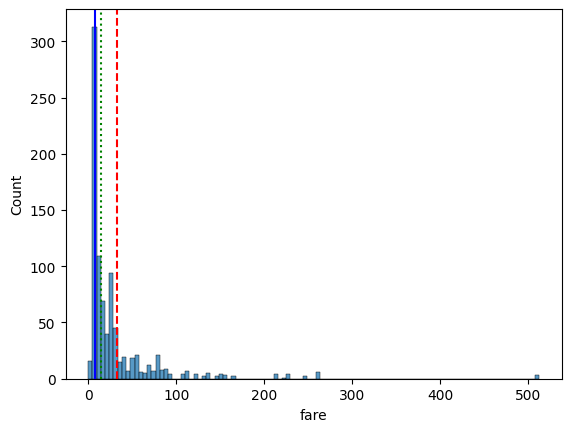

In [ ]:
sns.histplot(data=titanic_train.fare)
plt.axvline(titanic_train.fare.mean(), color='r', linestyle='--', label="Mean")
plt.axvline(titanic_train.fare.median(), color='g', linestyle='dotted', label="Median")
plt.axvline(titanic_train.fare.mode()[0], color='b', linestyle='-', label="Mode")

In [ ]:
titanic_train.mode(numeric_only=False, dropna=True)

survived  pclass                                   name   sex   age  \
0         0.0     3.0                    Abbing, Mr. Anthony  male  24.0   
1         NaN     NaN            Abbott, Mr. Rossmore Edward   NaN   NaN   
2         NaN     NaN       Abbott, Mrs. Stanton (Rosa Hunt)   NaN   NaN   
3         NaN     NaN                    Abelson, Mr. Samuel   NaN   NaN   
4         NaN     NaN  Abelson, Mrs. Samuel (Hannah Wizosky)   NaN   NaN   
..        ...     ...                                    ...   ...   ...   
886       NaN     NaN                de Mulder, Mr. Theodore   NaN   NaN   
887       NaN     NaN              de Pelsmaeker, Mr. Alfons   NaN   NaN   
888       NaN     NaN              del Carlo, Mr. Sebastiano   NaN   NaN   
889       NaN     NaN        van Billiard, Mr. Austin Blyler   NaN   NaN   
890       NaN     NaN            van Melkebeke, Mr. Philemon   NaN   NaN   

     sibsp  parch    ticket  fare        cabin embarked  
0      0.0    0.0      1601  8.05      B96 B98        S  
1      NaN    NaN    347082   NaN  C23 C25 C27      NaN  
2      NaN    NaN  CA. 2343   NaN           G6      NaN  
3      NaN    NaN       NaN   NaN          NaN      NaN  
4      NaN    NaN       NaN   NaN          NaN      NaN  
..     ...    ...       ...   ...          ...      ...  
886    NaN    NaN       NaN   NaN          NaN      NaN  
887    NaN    NaN       NaN   NaN          NaN      NaN  
888    NaN    NaN       NaN   NaN          NaN      NaN  
889    NaN    NaN       NaN   NaN          NaN      NaN  
890    NaN    NaN       NaN   NaN          NaN      NaN  

[891 rows x 11 columns]

In [ ]:
titanic_train[titanic_train.ticket=='347082'].shape

(7, 11)

<Axes: >

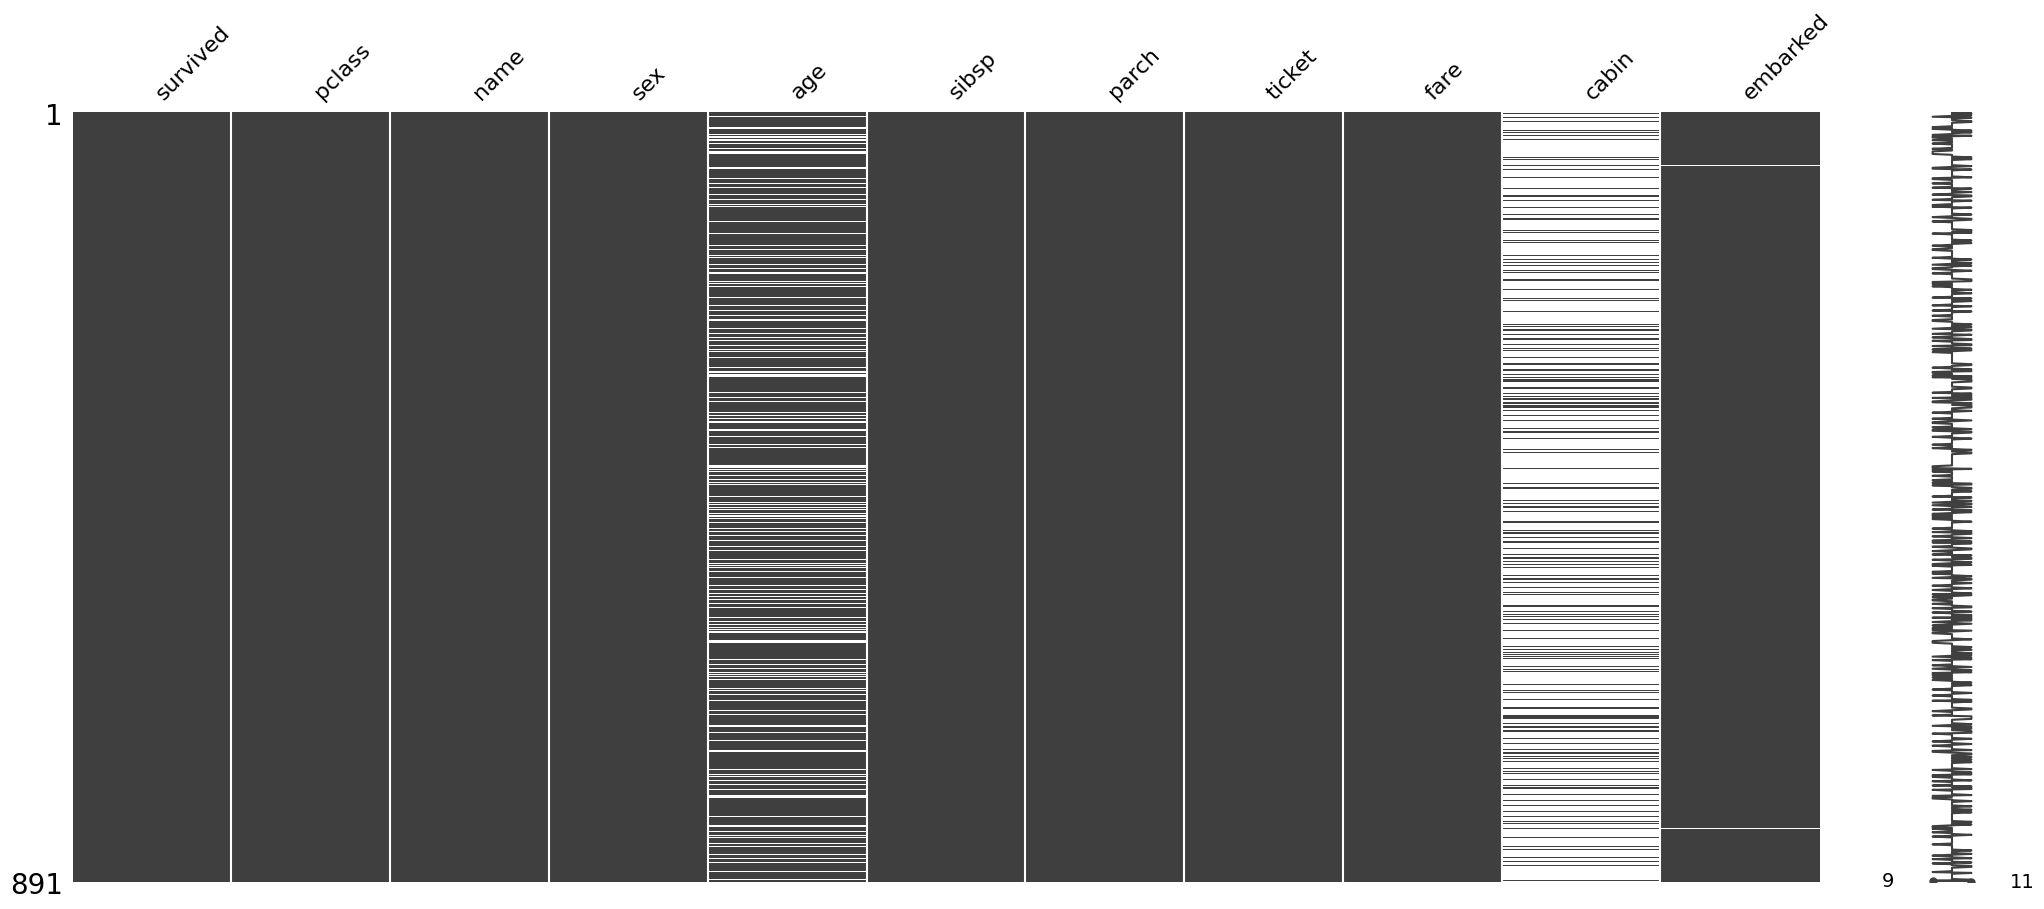

In [ ]:
import missingno as mn
mn.matrix(titanic_train)

In [ ]:
titanic_train[(titanic_train.sex=='male')&(titanic_train.pclass==1)].age.mean(), titanic_train[(titanic_train.sex=='female')&(titanic_train.pclass==1)].age.mean()


(41.28138613861386, 34.61176470588235)

In [ ]:
titanic_train[(titanic_train.sex=='male')&(titanic_train.pclass==2)].age.mean(), titanic_train[(titanic_train.sex=='female')&(titanic_train.pclass==2)].age.mean()

(30.74070707070707, 28.722972972972972)

### Normal distribution

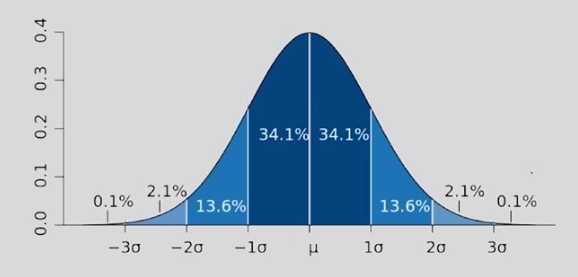

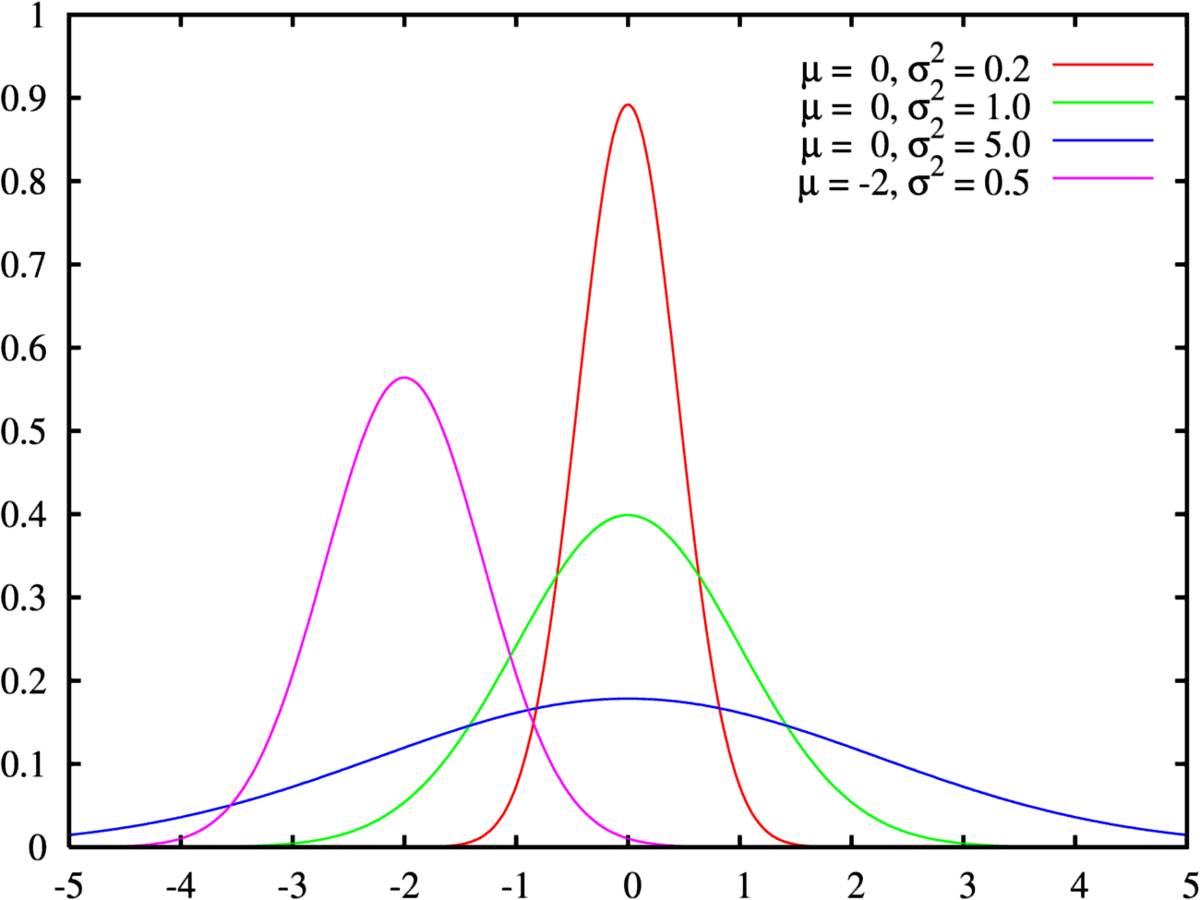

M +- 1 std ~ 68% of observatiions

M +- 2 std ~ 95% of observatiions

M +- 3 std ~ 100% of observatiions

-0.0013977930154745685 1.0021664823938252


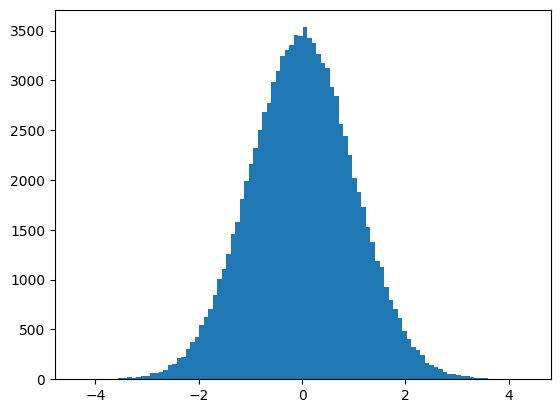

In [ ]:
rng = np.random.default_rng()
nd = rng.normal(size=100_000)
print(nd.mean(), nd.std())
plt.hist(nd, bins=100)
plt.show()

In [ ]:
np.mean(np.random.rand(40000))  # [0,1)

0.49964374745212425

(array([3953., 3968., 4001., 3955., 3989., 4011., 4004., 4089., 4141.,
        3889.]),
 array([8.43221130e-06, 1.00003284e-01, 1.99998137e-01, 2.99992989e-01,
        3.99987841e-01, 4.99982693e-01, 5.99977546e-01, 6.99972398e-01,
        7.99967250e-01, 8.99962102e-01, 9.99956954e-01]),
 <BarContainer object of 10 artists>)

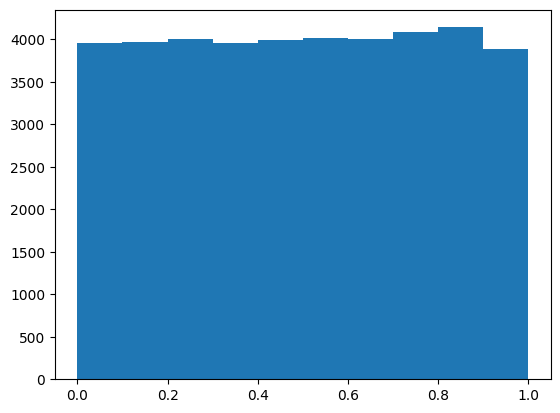

In [ ]:
plt.hist(np.random.rand(40000))

### Measures of spread (меры разброса)

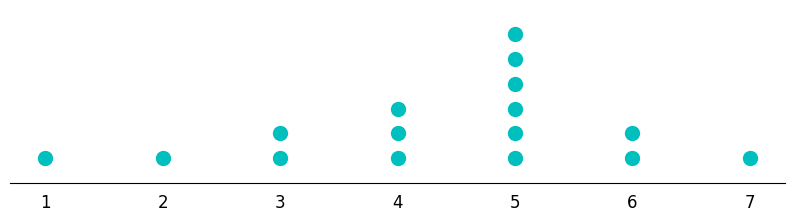

(4.375, ModeResult(mode=5, count=6), 5.0)

In [ ]:
X = [1,2,3,3,4,4,4,5,5,5,5,5,5,6,6,7]
plot_dot(X, figsize=(10, 2.25))
np.mean(X), stats.mode(X), np.median(X)

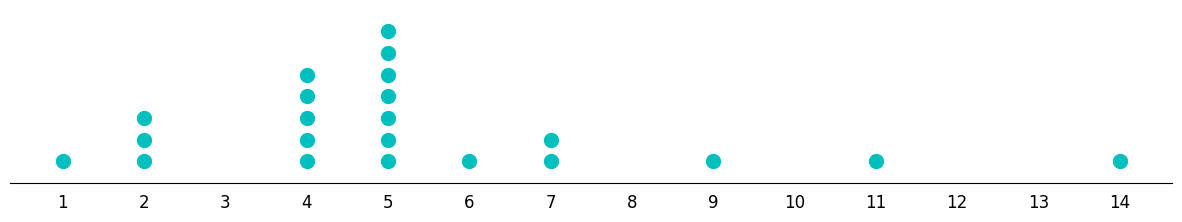

(5.2727272727272725, ModeResult(mode=5, count=7), 5.0)

In [ ]:
X = [1,2,2,2,4,4,4,4,4,5,5,5,5,5,5,5, 6, 7,7,9,11, 14]
plot_dot(X, figsize=(15, 2.25))
np.mean(X), stats.mode(X), np.median(X)

#### **Range (Размах вариации, диапазон)**

The range of a dataset is the difference between the largest and smallest values in that dataset.

$R = x_{max} - x_{min}$

| dataset1 | dataset2 |
| --- | --- |
| 2 | 13 |
| 3 | 14 |
| 4 | 10 |
| 7 | 11 |
| 2 | 13 |
| 2 | - |

What is R for dataset 1 and dataset 2? Which dataset has more variablity?


In [ ]:
titanic_train.age.max() - titanic_train.age.min()

79.58

In [ ]:
X = [1,3,5,6,7,8,9,1000]
max(X) - min(X)

999

#### **(Sample) variance (дисперсия выборки)**

Several statistics are commonly used as a measure of the spread of a distribution, including **variance, standard deviation, and interquartile range**.

**Spread is an indicator of how far away from the center we are still likely to find data values.**

The **variance** is a standard measure of spread. It is calculated for a list of
numbers, e.g., the n observations of a particular measurement labeled x1 through
xn, based on the n sample deviations (or just “deviations”). Then for any data
value, xi, the corresponding deviation is (xi - x¯), which is the signed (- for lower and + for higher) distance of the data value from the mean of all of the n data values. It is not hard to prove that the sum of all of the deviations of a sample is zero.

The **variance of a population** is defined as the mean squared deviation. The sample formula for the variance of observed data conventionally has **n-1** in the denominator instead of n to achieve the property of “unbiasedness”, which roughly means that when calculated for many different random samples from the same population, the average should match the corresponding population quantity (here, σ2 ).

This is a measure of spread, because the bigger the deviations
from the mean, the bigger the variance gets. In most cases, squaring is better
than taking the absolute value because it puts special emphasis on highly deviant values.


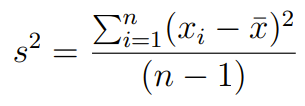

**Дисперсия генеральной совокупности**

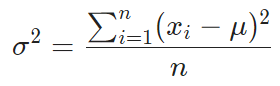

**Дисперсия выборки**

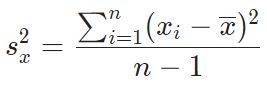


Why are those different?

In [ ]:
X = np.array([1,2,2,2,4,4,4,4,4,5,5,5,5,5,5,5, 6, 7,7,9,11, 14])

In [ ]:
np.std(titanic_train.age)

14.516321150817316

In [ ]:
np.std([20,20,20,20,21])

0.4

#### **Standart deviation**

The standard deviation is simply the square root of the variance. Therefore
it has the same units as the original data, which helps make it more **interpretable**.

A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low, or small, standard deviation indicates data are clustered tightly around the mean, and high, or large, standard deviation indicates data are more spread out.

[Img source](https://www.nlm.nih.gov/oet/ed/stats/02-900.html#:~:text=Low%2C%20or%20small%2C%20standard%20deviation,data%20are%20more%20spread%20out.)

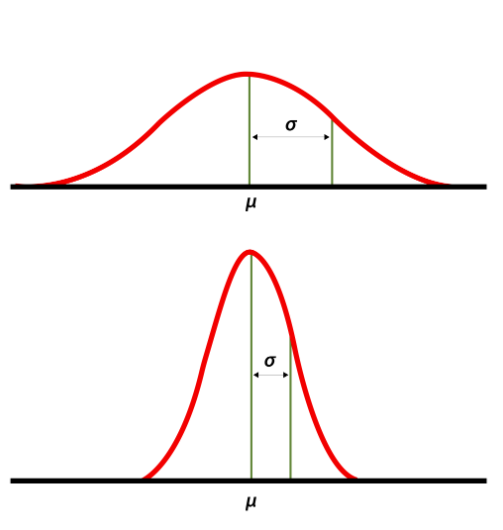

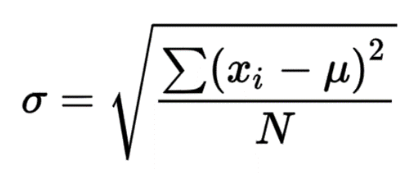

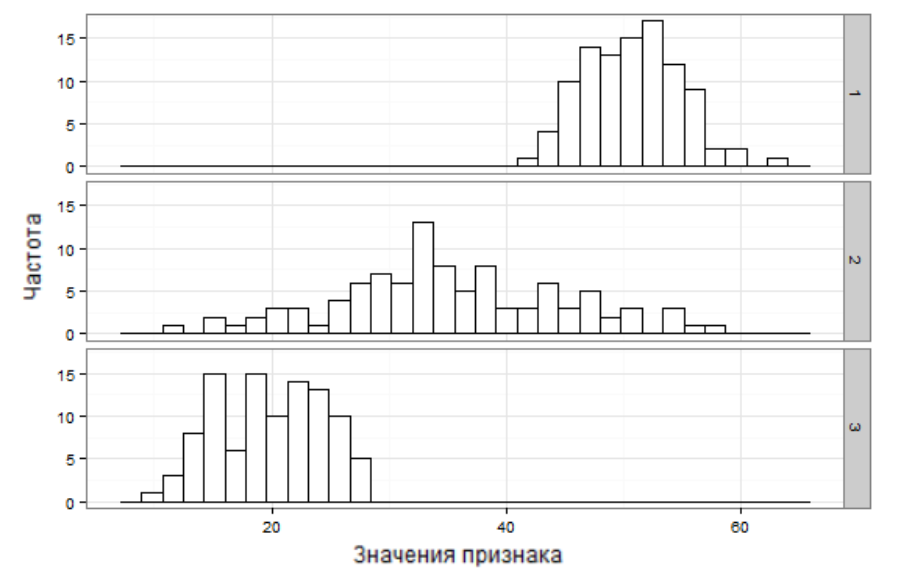

В какой из выборок наибольшее стандартное отклонение?

(1)  1 3 2 4 5 7 1 8

(2) 100 300 250 400 230 280 320 112

(3) 15 10 13 7 28 31 20 32

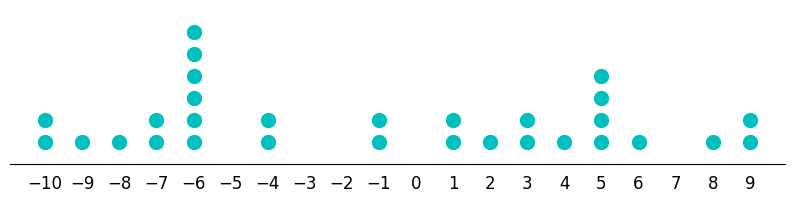

In [ ]:
X = np.random.randint(-10,10,30)
plot_dot(X, figsize=(10,2))

In [ ]:
np.std(X), np.var(X)

(6.053924347066125, 36.65)

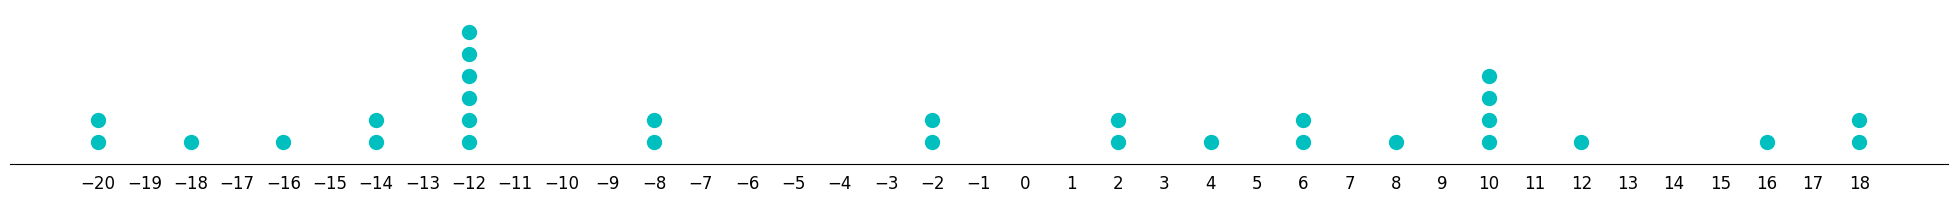

In [ ]:
X = X*2
plot_dot(X, figsize=(25,2))

In [ ]:
np.std(X), np.var(X)

(11.904994283446293, 141.7288888888889)

In [ ]:
Dx + c =D
SDx + c = SDx

In [ ]:
Dx*c = Dx*c^2
SDx*c = SDx*c

In [ ]:
a 2 4 5 8
b 6 12 15 24

std2 = std*3

#### **Quantiles and percentiles**

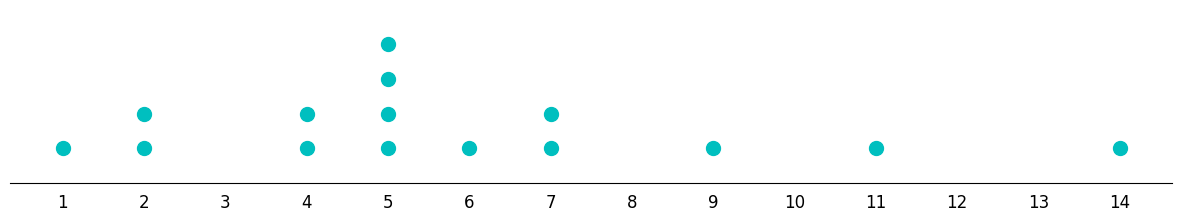

(5.8, ModeResult(mode=5, count=4), 5.0)

In [ ]:
X = [1,2,2,4,4,5,5,5,5,6,7,7,9,11,14]
plot_dot(X, figsize=(15, 2.25))
np.mean(X), stats.mode(X), np.median(X)

In [ ]:
Q2 = median = 5
Q1 = 4
Q3 = 7

In [ ]:
from statistics import quantiles
quantiles(X, n=4)

[4.0, 5.0, 7.0]

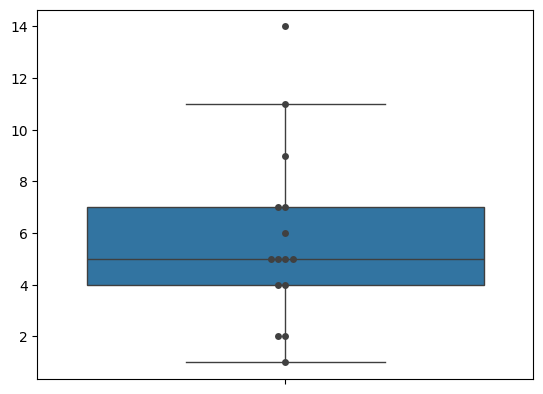

In [ ]:
ax = sns.boxplot(X, showfliers=False, orient='h')
ax = sns.swarmplot(X, color='.25')
plt.show()

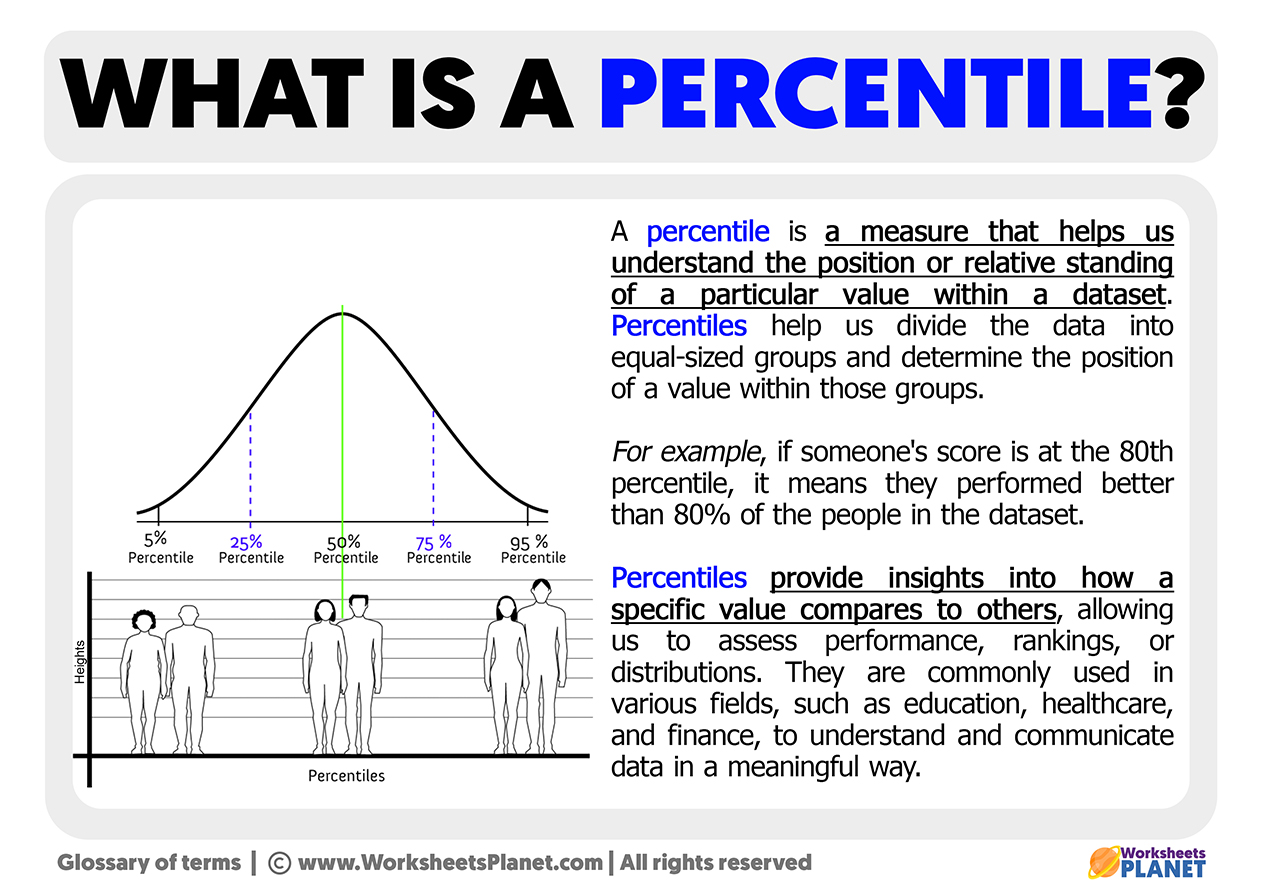

Percentile is found with the equation: P = n/N * 100%

Where P is the percentile, lower case n is the number of data points below the data point of interest, and N is the total number of data points in the data set.

**Процентиль? Квантиль? Квартиль??**

Процентили: Диапазон от 0 до 100.

Квартили: Диапазон от 0 до 4.

Квантиль: диапазон от любого значения до любого другого значения.

Процентили и квартили — это просто типы квантилей.

**Некоторые типы квантилей даже имеют определенные названия, в том числе:**

4-квантили называются квартилями.

5-квантили называются квинтилями.

8-квантили называются октилями.

10-квантили называются децилями.

100-квантили называются процентилями.


**Процентили и квартили имеют следующие отношения:**

0 quartile = 0 quantile = 0 percentile (min)

1 quartile = 0.25 quantile = 25 percentile

2 quartile = .5 quantile = 50 percentile (median)

3 quartile = .75 quantile = 75 percentile

4 quartile = 1 quantile = 100 percentile (max)

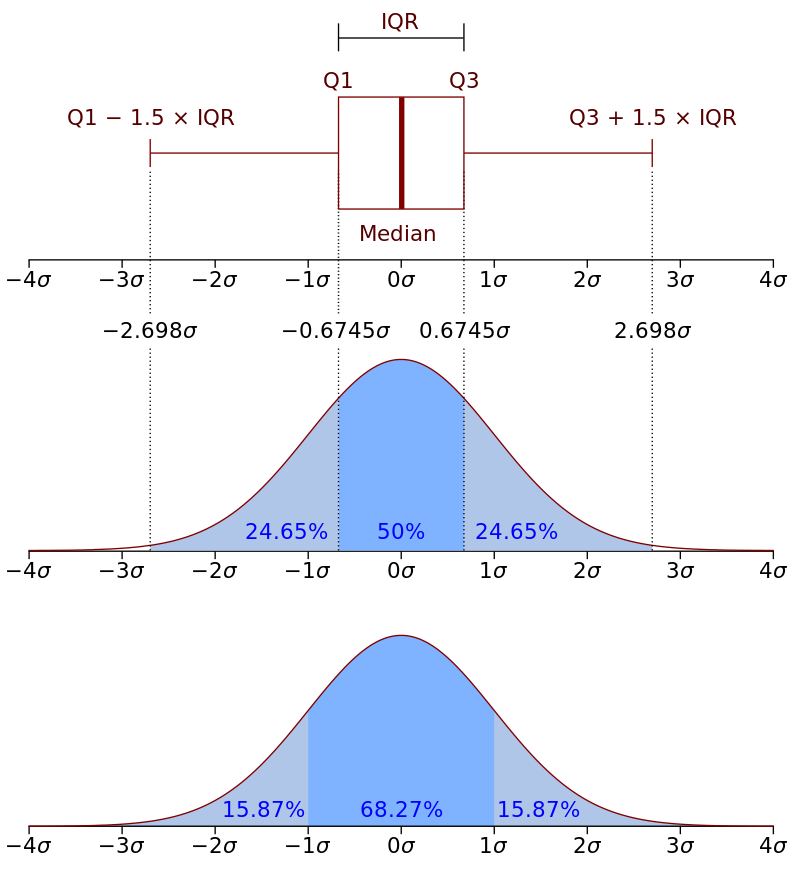

#### **Boxplot**

Sometimes called **box-and-whiskers plot**, box-and-whiskers diagram, box plot, ящик с усами, диаграмма размаха, усиковая диаграмма, коробчатая диаграмма, блочная диаграмма с ограничителями выбросов.

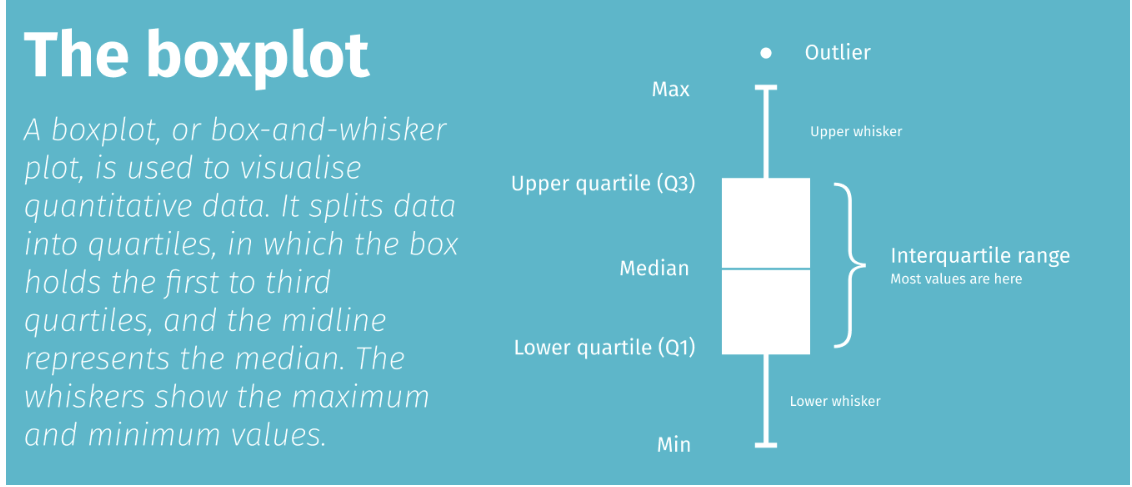

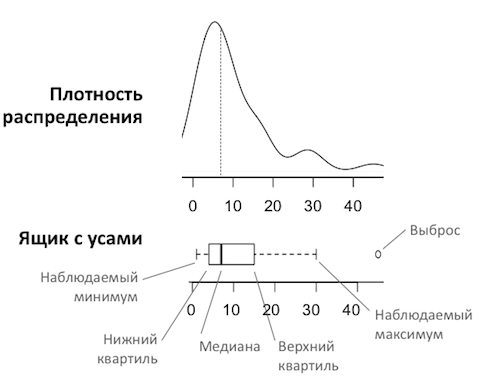


In [ ]:
# https://www.codecamp.ru/blog/percentile-vs-quartile-vs-quantile/

#### Lets take a look at the **outliers** (with the help of a **boxplot**)

***Why would we care about outliers?***

1. They can affect some ML models` performance. **Some algorithms are sensitive to outliers influence** (e.g. linear regression and k-nearest neighbors). These models attempt to draw patterns from the data, but outliers can mislead the process, skewing the regression line or decision boundary. As a result, the model may fail to generalize well and make inaccurate predictions on new data. Models like decision trees and random forests can handle outliers more gracefully.

2. Data Distribution.
The presence of outliers can distort the underlying data distribution. In datasets with features normally distributed, outliers **can make the distribution appear skewed or non-normal**.

3. **Overfitting**.
One of the most insidious consequences of outliers is overfitting. In this scenario, the model becomes overly complex and starts **fitting the noise** present in the data rather than the true underlying patterns. Accommodating outliers can lead to poor generalization, rendering the model ineffective for new data.

6. Domain-Specific Impact.
In certain scenarios, outliers can be genuinely important data points representing **rare events or critical situations**. For example, in fraud detection, outliers could indicate fraudulent activities, while in medical diagnosis, they might point to severe anomalies. Here, it is imperative to carefully analyze and verify the significance of the outliers.

7. Feature Engineering.
Outliers can also influence feature engineering decisions. **Scaling methods**, such as Min-Max scaling, can be sensitive to outliers, while more robust methods, like Z-score normalization, are less affected by their presence.


[Source](https://harshjadhav100.medium.com/the-impact-of-outliers-in-machine-learning-6cf4e4d33f21)

How do you think a boxplot identifies outliers?

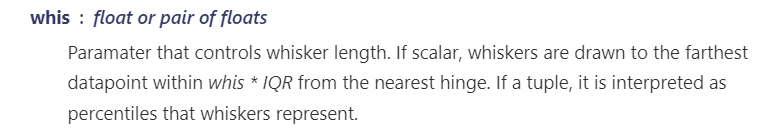

whis=1.5 by default

In [ ]:
Q1 = titanic_train.age.quantile(0.25)
Q3 = titanic_train.age.quantile(0.75)
IQR = Q3 - Q1
whis = 1.5

less_cond = Q1 - whis * IQR
greater_cond = Q3 + whis * IQR

print(f"{Q1=}, {Q3=}, {IQR=}, {whis*IQR=}, {less_cond=}, {greater_cond=}")

titanic_train[(titanic_train['age'] < less_cond) | (titanic_train['age'] > greater_cond)]

Q1=20.125, Q3=38.0, IQR=17.875, whis*IQR=26.8125, less_cond=-6.6875, greater_cond=64.8125


survived  pclass                                  name   sex   age  \
33          0       2                 Wheadon, Mr. Edward H  male  66.0   
54          0       1        Ostby, Mr. Engelhart Cornelius  male  65.0   
96          0       1             Goldschmidt, Mr. George B  male  71.0   
116         0       3                  Connors, Mr. Patrick  male  70.5   
280         0       3                      Duane, Mr. Frank  male  65.0   
456         0       1             Millet, Mr. Francis Davis  male  65.0   
493         0       1               Artagaveytia, Mr. Ramon  male  71.0   
630         1       1  Barkworth, Mr. Algernon Henry Wilson  male  80.0   
672         0       2           Mitchell, Mr. Henry Michael  male  70.0   
745         0       1          Crosby, Capt. Edward Gifford  male  70.0   
851         0       3                   Svensson, Mr. Johan  male  74.0   

     sibsp  parch      ticket     fare cabin embarked  
33       0      0  C.A. 24579  10.5000   NaN        S  
54       0      1      113509  61.9792   B30        C  
96       0      0    PC 17754  34.6542    A5        C  
116      0      0      370369   7.7500   NaN        Q  
280      0      0      336439   7.7500   NaN        Q  
456      0      0       13509  26.5500   E38        S  
493      0      0    PC 17609  49.5042   NaN        C  
630      0      0       27042  30.0000   A23        S  
672      0      0  C.A. 24580  10.5000   NaN        S  
745      1      1   WE/P 5735  71.0000   B22        S  
851      0      0      347060   7.7750   NaN        S

In [ ]:
from matplotlib.cbook import boxplot_stats

boxplot_stats(titanic_train.age[~titanic_train.age.isna()])[0]['fliers']

array([66. , 65. , 71. , 70.5, 65. , 65. , 71. , 80. , 70. , 70. , 74. ])

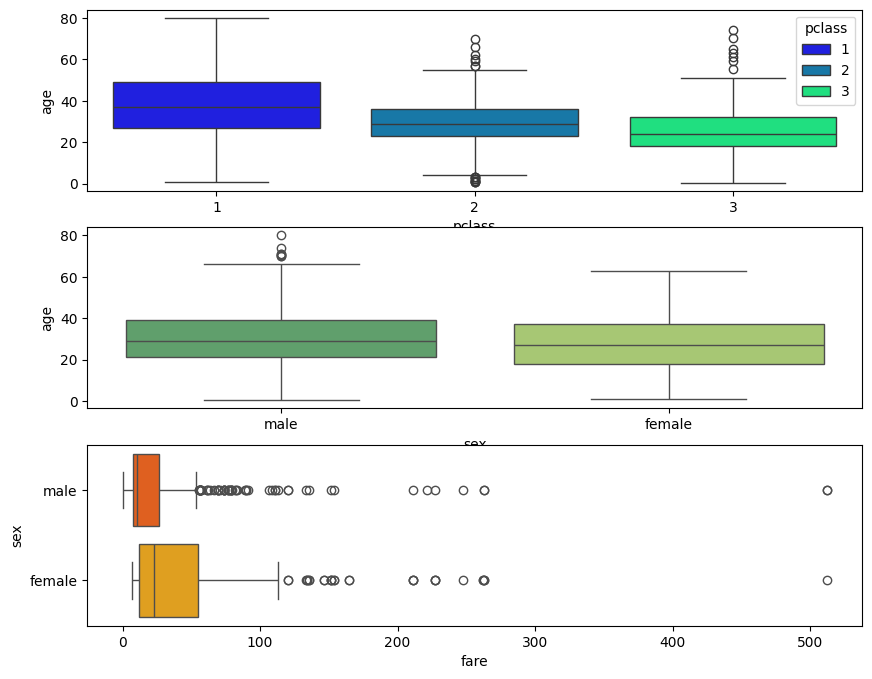

In [ ]:
fig, axs = plt.subplots(3, 1, figsize = (10, 8))
sns.boxplot(x='pclass', y='age', data=titanic_train, palette='winter', ax=axs[0], hue='pclass')
sns.boxplot(x='sex', y='age', data=titanic_train, palette='summer', ax=axs[1], hue='sex')
sns.boxplot(x='fare', y='sex', data=titanic_train, palette='autumn', ax=axs[2], hue='sex')
plt.show()

In [ ]:
fig = px.box(titanic_train.age, points="all",notched=True,)
fig.show()
#https://plotly.com/python/box-plots/

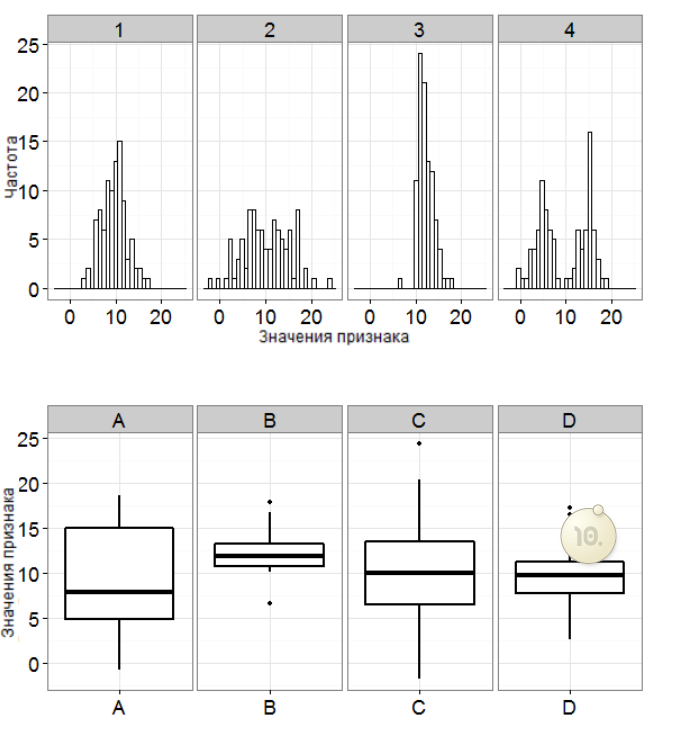

#### **The Interquartile Range (IQR) Межквартильный размах**

The interquartile range is the middle half of the data. To visualize it, think about the median value that splits the dataset in half. Similarly, you can divide the data into quarters. Statisticians refer to these quarters as **quartiles** and denote them from low to high as **Q1, Q2, and Q3**. The lowest quartile (Q1) contains the quarter of the dataset with the smallest values. The upper quartile (Q4) contains the quarter of the dataset with the highest values. **The interquartile range is the middle half of the data that is in between the upper and lower quartiles**. In other words, the interquartile range **includes the 50% of data points that fall between Q1 and Q3**.

! It is the **robust** criterion of attribute variation, since it **does not depend on anomalies**.

In [ ]:
iqr = titanic_train.age.quantile(0.75) - titanic_train.age.quantile(0.25)
iqr

17.875

## Graphical analysis

### **Histogram**

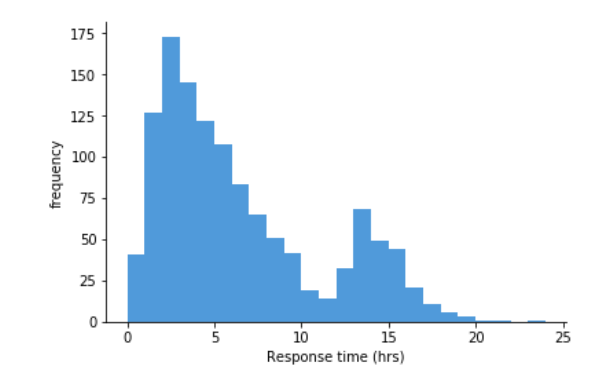

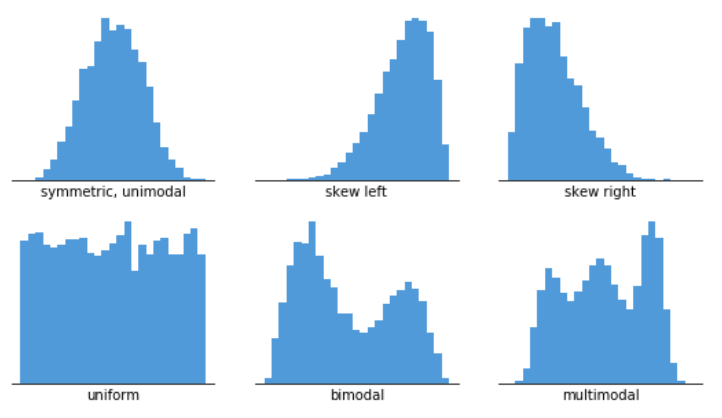

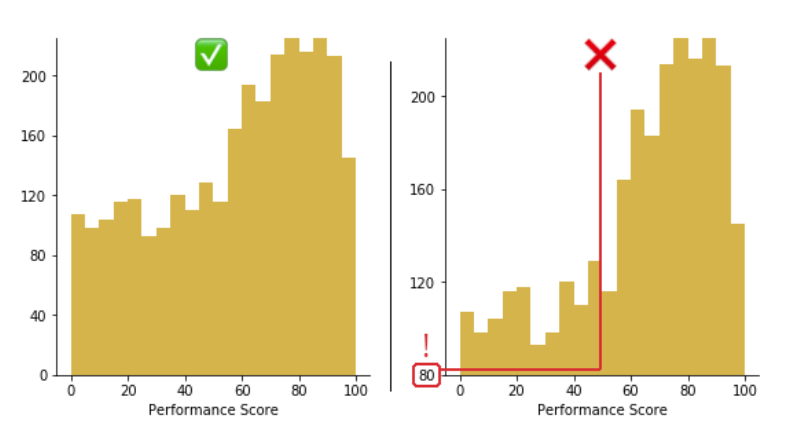

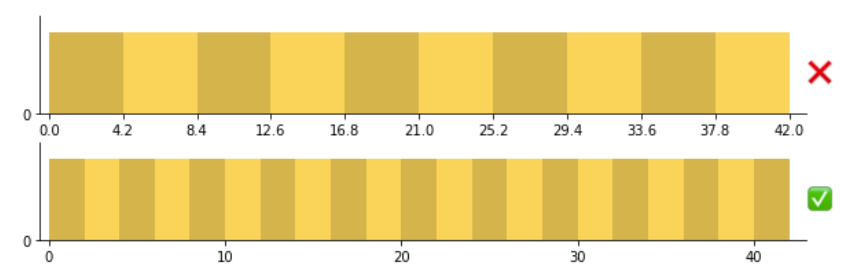

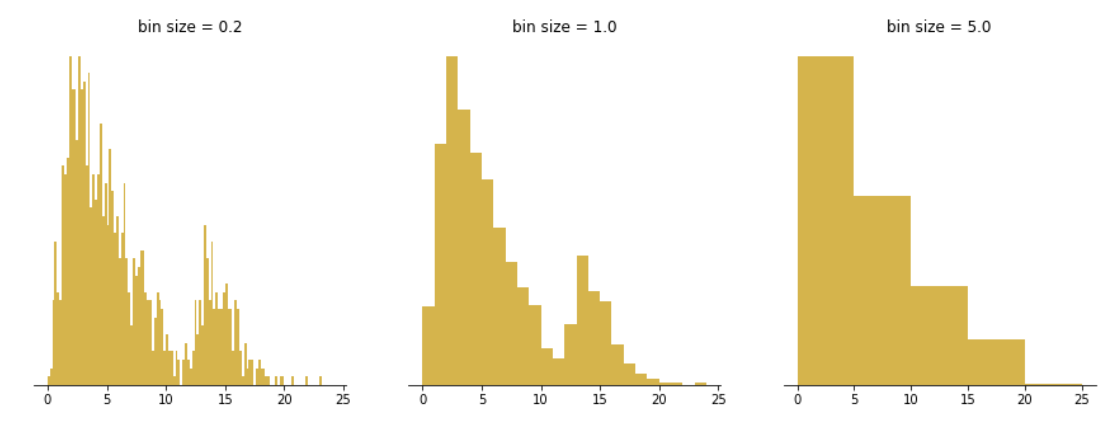

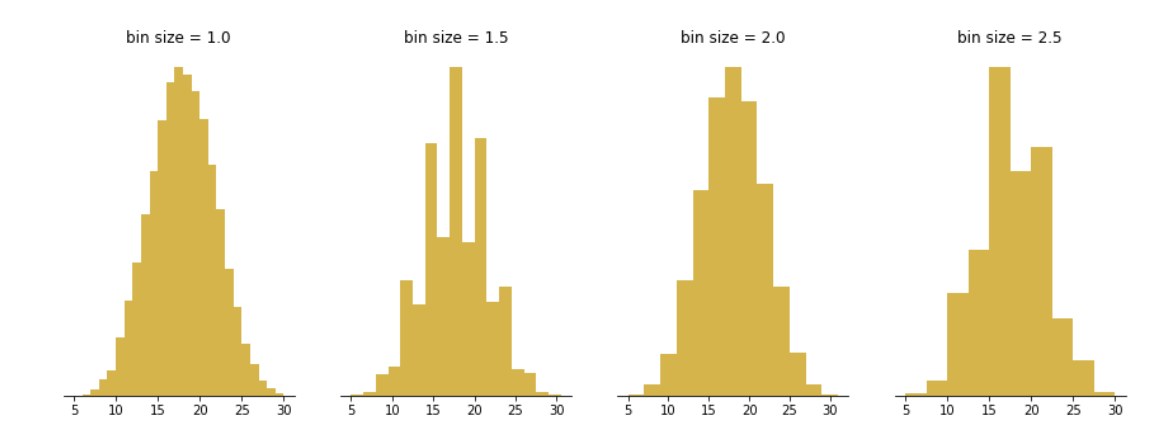*

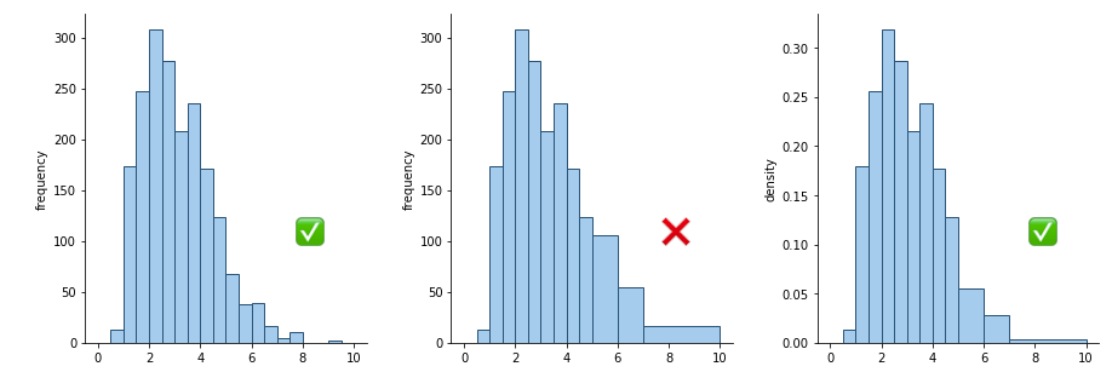

In [ ]:
n_bins = round(np.sqrt(titanic_train["age"].max()))
n_bins

9

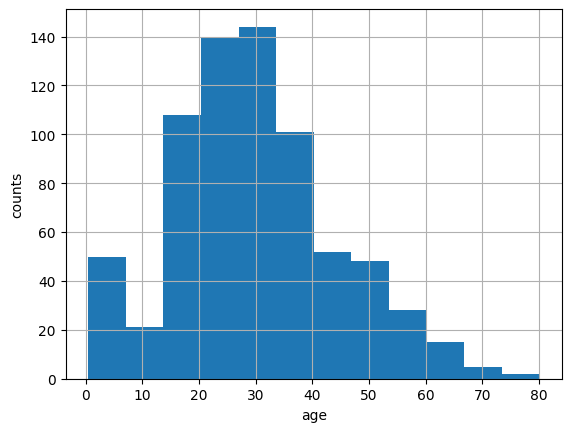

In [ ]:
ax = titanic_train["age"].hist(bins=12)

plt.xlabel('age')
plt.ylabel('counts')
plt.show()

In [ ]:
titanic_train.age.mean(), titanic_train.age.median()

(29.69911764705882, 28.0)

In [ ]:
np.histogram(titanic_train["age"].dropna())

(array([ 54,  46, 177, 169, 118,  70,  45,  24,   9,   2]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]))

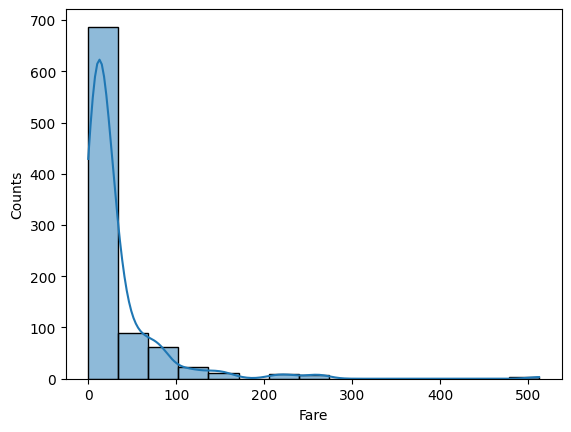

In [ ]:
ax = sns.histplot(x=titanic_train["fare"], bins=15, kde=True)

plt.xlabel('Fare')
plt.ylabel('Counts')
plt.show()

In [ ]:
fig = px.histogram(
    titanic_train["fare"],
    nbins=15,
    x='fare',
    histnorm='probability density',
    title='Fare',
    opacity=0.8,
    color_discrete_sequence=['indianred']
  )
fig.show()

In [ ]:
fig = px.histogram(titanic_train, x="age", color="sex")
fig.show()

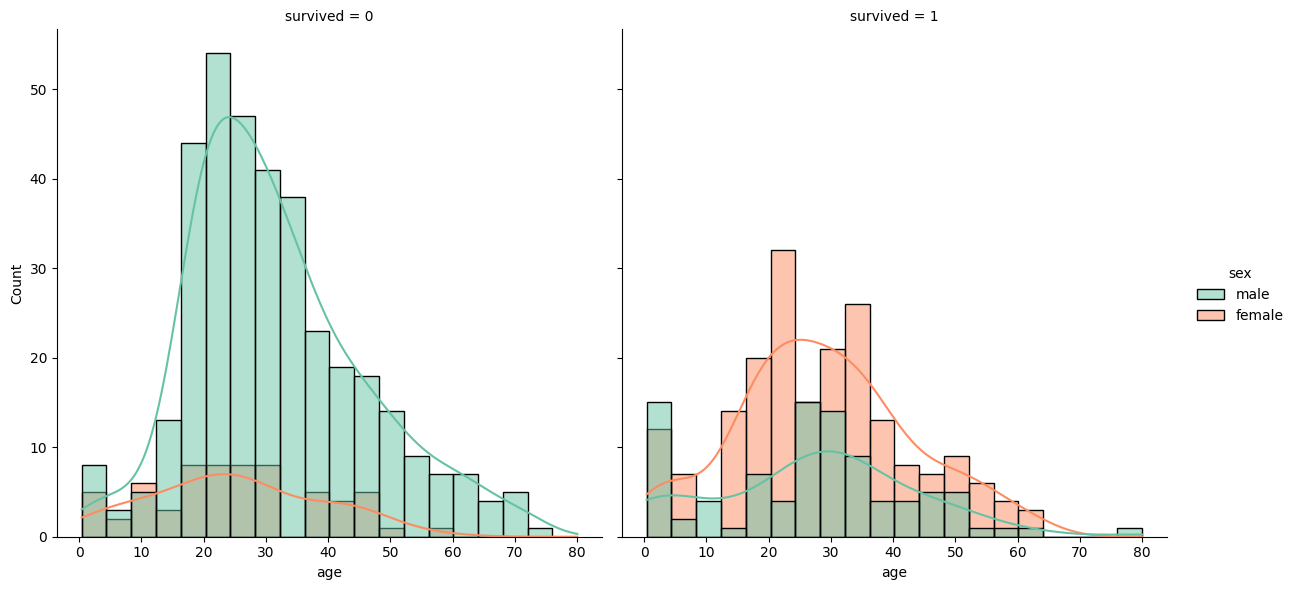

In [ ]:
sns.displot(data=titanic_train, x="age", hue='sex', col='survived', palette='Set2', kde=True, height=6);

In [ ]:
fig = px.histogram(some_misterious_data)
fig.show()

<Axes: >

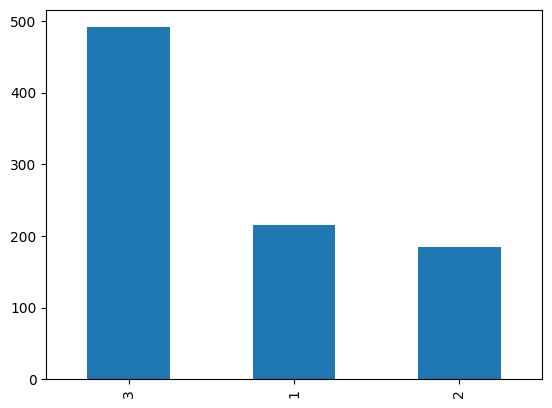

In [ ]:
titanic_train.pclass.value_counts().plot.bar()

### **Crosstab**

In [ ]:
pclass_abs = pd.crosstab(index = titanic_train.pclass, columns = titanic_train.survived)

pclass_abs.index = ['Class 1', 'Class 2', 'Class 3']
pclass_abs.columns = ['Not survived', 'Survived']

pclass_abs

Not survived  Survived
Class 1            80       136
Class 2            97        87
Class 3           372       119

In [ ]:
pclass_abs = pd.crosstab(index = titanic_train.pclass, columns = titanic_train.survived, normalize='index')  # + normalize='columns'

pclass_abs.index = ['Class 1', 'Class 2', 'Class 3']
pclass_abs.columns = ['Not survived', 'Survived']

pclass_abs

Not survived  Survived
Class 1      0.370370  0.629630
Class 2      0.527174  0.472826
Class 3      0.757637  0.242363

### **Barplot, countplot, heatmap**

<Axes: xlabel='sibsp', ylabel='survived'>

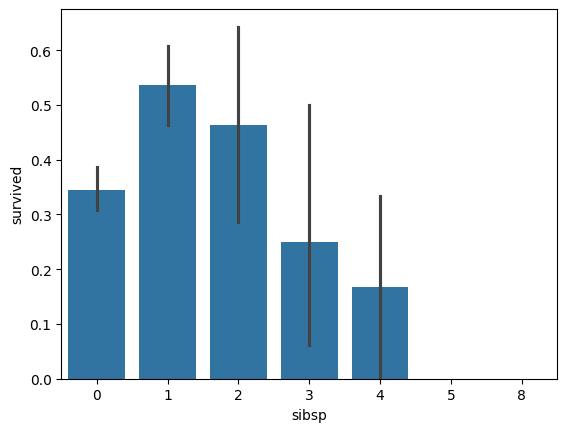

In [ ]:
sns.barplot(x="sibsp", y="survived", data=titanic_train)

In [ ]:
pd.crosstab(titanic_train.sibsp, titanic_train.pclass).style.background_gradient(cmap='summer_r')

<Axes: xlabel='parch', ylabel='survived'>

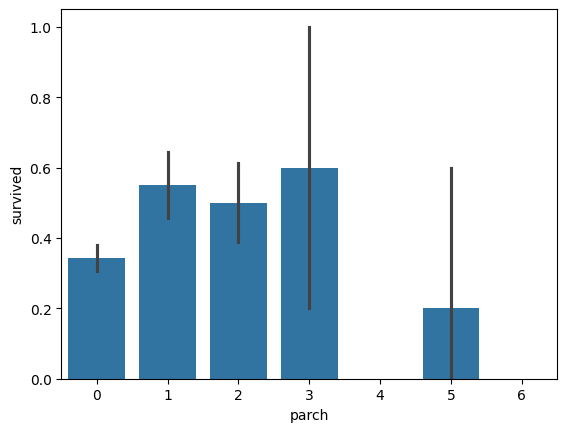

In [ ]:
sns.barplot(x="parch", y="survived", data=titanic_train)

In [ ]:
pd.crosstab(titanic_train.parch, titanic_train.pclass).style.background_gradient(cmap='summer_r')

<Axes: >

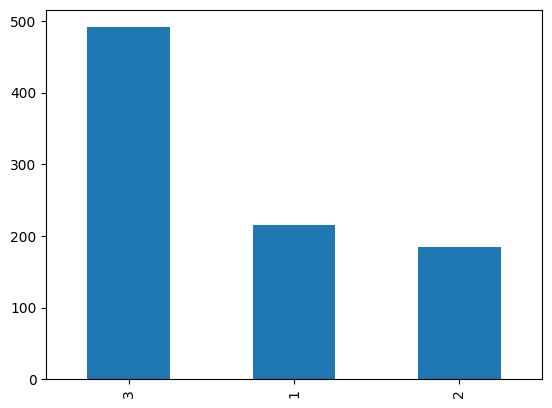

In [ ]:
titanic_train.pclass.value_counts().plot.bar()

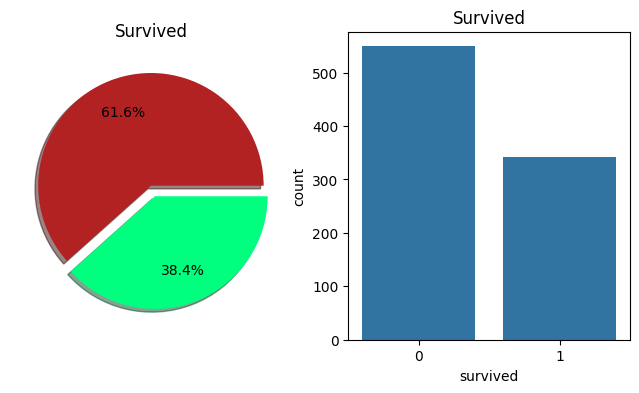

In [ ]:
figure, ax = plt.subplots(
    1,
    2,
    figsize=(8, 4))

titanic_train['survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    labels=['Perished', 'Survived'],
    shadow=True,
    colors = ['firebrick', 'springgreen'], # ['red', 'blue']
    pctdistance=0.7,
    labeldistance = None,
    radius= 1,
    frame=False
    )

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x=titanic_train['survived'], ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: xlabel='pclass', ylabel='count'>

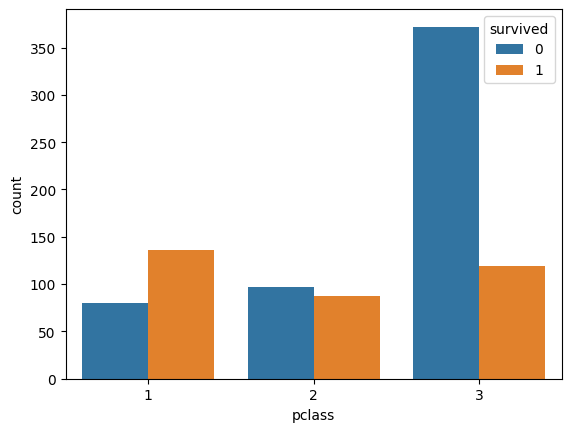

In [ ]:
sns.countplot(x = 'pclass', hue = 'survived', data = titanic_train)

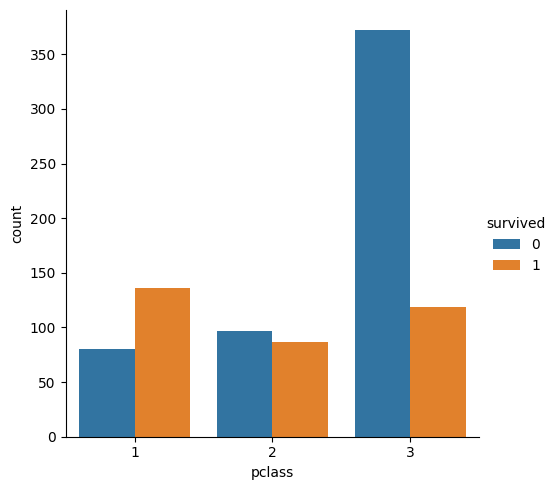

In [ ]:
sns.catplot(x = 'pclass', hue = 'survived', data = titanic_train, kind = 'count')

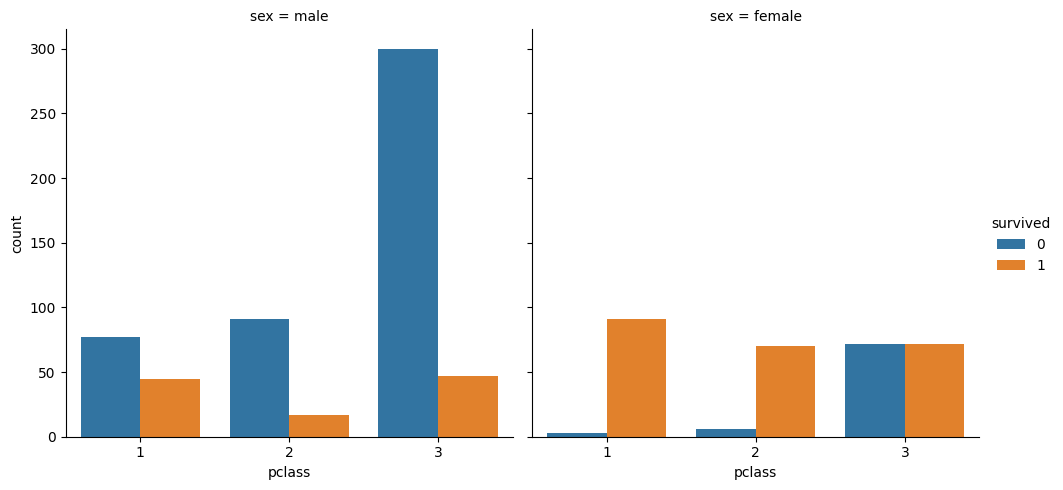

In [ ]:
sns.catplot(x = 'pclass', hue = 'survived', col = 'sex', kind = 'count', data = titanic_train);

In [ ]:
px.histogram(
    titanic_train,
    x = 'pclass',
    color = 'survived',
    barmode = 'group',
    text_auto = True,
    title = 'Survival by class'
)

In [ ]:
px.histogram(
    titanic_train[~titanic_train.embarked.isna()],
    x = 'pclass',
    color = 'survived',
    facet_col = 'embarked',
    facet_row = 'sex',
    barmode = 'group',
    text_auto = True,
    title = 'Survival by class, gender and port of embarkation'
)

###  Skewness and kurtosis

Two additional useful **univariate descriptors** are the skewness and kurtosis of a distribution.

Skewness is a measure of **asymmetry**: not skewed, negative skew, positive skew.

· In a normal distribution, the mean divides the curve symmetrically into two equal parts at the median and the value of **skewness is zero**.

· When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.

· When the value of the skewness is **negative**, the tail of the distribution is longer towards the left hand side of the curve.

· When the value of the skewness is **positive**, the tail of the distribution is longer towards the right hand side of the curve

· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed



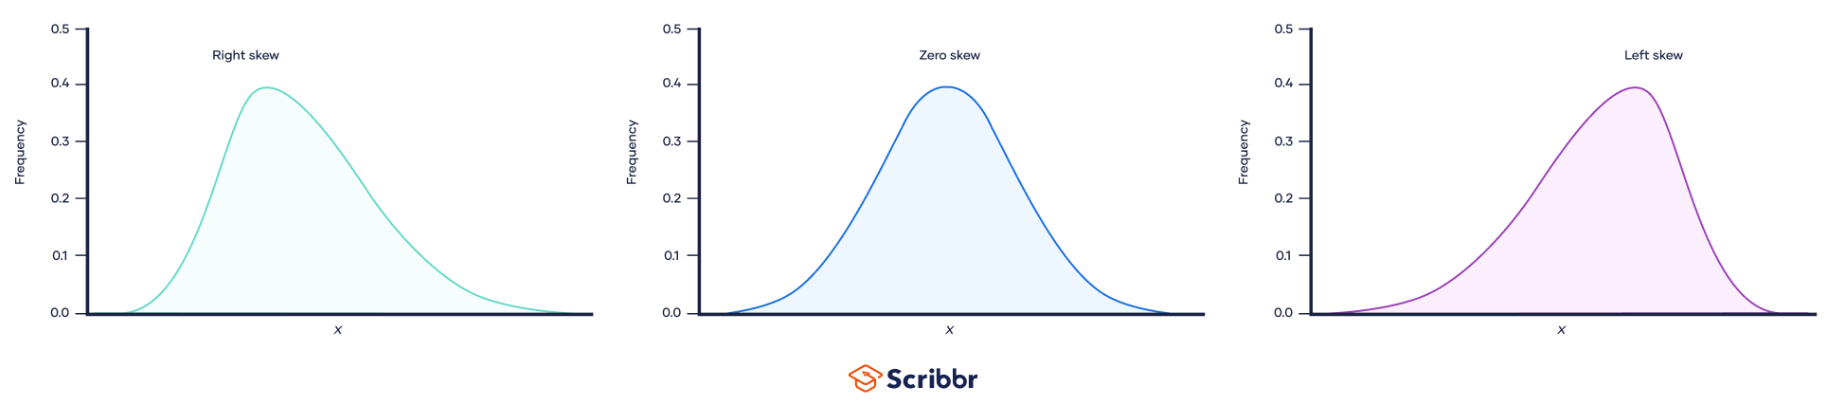

Kurtosis is a measure of how much of a variable distribution can be found in the tails. The term kurtosis is derived from kurtos (Greek for “convex” or “humpbacked”). A prevalent misconception is that kurtosis measures the “peakedness” of a distribution; however, the contribution of a central peak or range to kurtosis is often small.

https://www.britannica.com/topic/kurtosis-statistics

· If the distribution is tall and thin it is called a **leptokurtic** distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called **platykurtic**(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a **mesokurtic** (Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

Distributions with medium kurtosis (medium tails) are mesokurtic.
Distributions with low kurtosis (thin tails) are platykurtic.
Distributions with high kurtosis (fat tails) are leptokurtic.

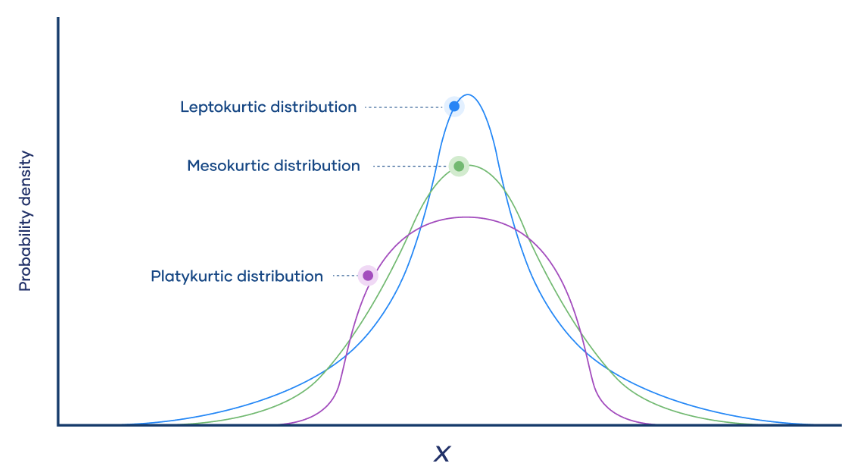

Source https://www.scribbr.com/statistics/kurtosis/

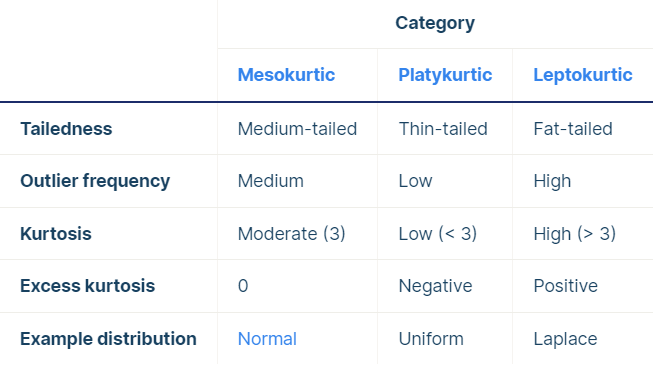

In [ ]:
titanic_train.age.skew()

0.38910778230082704

In [ ]:
titanic_train.age.kurt()

0.17827415364210353

# Multivariate

### Relationship between two categorical variables

In [ ]:
# CROSSTAB

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=True)

survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

In [ ]:
titanic_train.groupby(['pclass', 'survived'])['survived'].count().unstack().fillna(0)

survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

In [ ]:
# https://pbpython.com/pandas-pivot-table-explained.html
titanic_train.pivot_table(index='pclass', columns='survived', aggfunc={'survived':len}, fill_value=0)

survived     
survived        0    1
pclass                
1              80  136
2              97   87
3             372  119

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=True, margins_name="Total")

survived    0    1  Total
pclass                   
1          80  136    216
2          97   87    184
3         372  119    491
Total     549  342    891

In [ ]:
pd.crosstab(titanic_train.pclass, titanic_train.survived, values=titanic_train.age, aggfunc='mean').round(0)

survived     0     1
pclass              
1         44.0  35.0
2         34.0  26.0
3         27.0  21.0

In [ ]:
titanic_train[(titanic_train.pclass==1)&(titanic_train.survived==1)].age.mean()

35.36819672131148

In [ ]:
pd.crosstab(titanic_train.pclass, titanic_train.survived, values=titanic_train.fare, aggfunc='mean').round(3)

survived       0       1
pclass                  
1         64.684  95.608
2         19.412  22.056
3         13.669  13.695

In [ ]:
titanic_train[(titanic_train.pclass==1)&(titanic_train.survived==0)].fare.mean()

64.6840075

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=True, normalize=True)

survived         0         1       All
pclass                                
1         0.089787  0.152637  0.242424
2         0.108866  0.097643  0.206510
3         0.417508  0.133558  0.551066
All       0.616162  0.383838  1.000000

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=True, normalize='columns')

survived         0         1       All
pclass                                
1         0.145719  0.397661  0.242424
2         0.176685  0.254386  0.206510
3         0.677596  0.347953  0.551066

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=True, normalize='index')

survived         0         1
pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363
All       0.616162  0.383838

In [ ]:
# BARCHART

<Axes: title={'center': 'Survival Analysis Per Class'}, xlabel='pclass'>

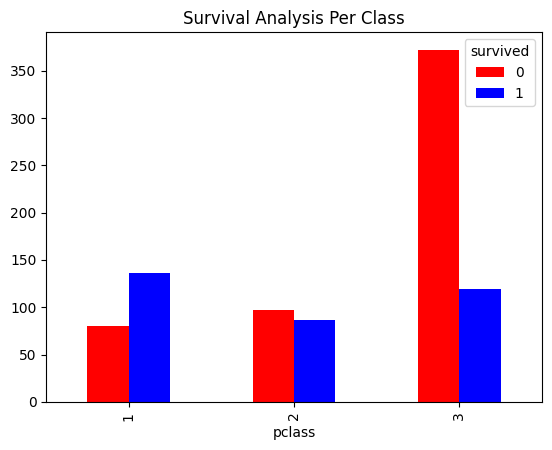

In [ ]:
pd.crosstab(titanic_train['pclass'], titanic_train['survived'], margins=False).plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title='Survival Analysis Per Class')

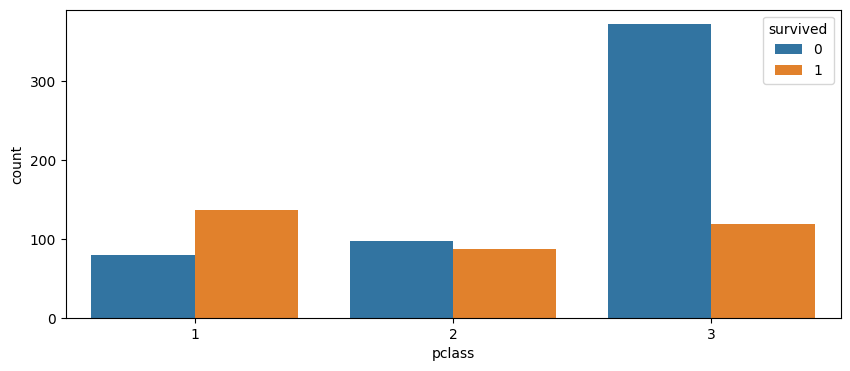

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x=titanic_train['pclass'], hue=titanic_train['survived'])
ax.yaxis.set_major_locator(ticker.IndexLocator(100, 0))

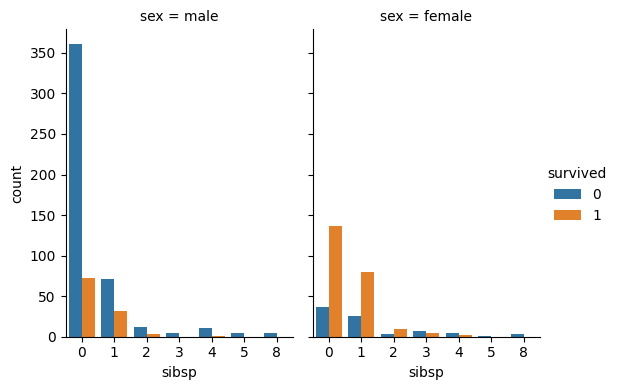

In [ ]:
sns.catplot(x="sibsp", hue="survived", col="sex",
            data=titanic_train, kind="count",
            height=4, aspect=.7);

In [ ]:
Chi square, CramerV

### Relationship between quantitative variables

In [ ]:
# Scatterplot

Text(0, 0.5, 'Fare')

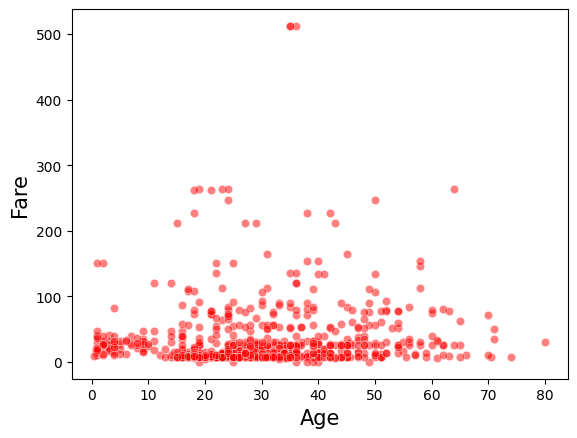

In [ ]:
sns.scatterplot(x=titanic_train['age'], y=titanic_train['fare'], alpha=0.5, color='Red')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Fare', fontsize=15)

In [ ]:
titanic_train[['fare', 'age']].corr()

fare       age
fare  1.000000  0.096067
age   0.096067  1.000000

In [ ]:
# Lineplot

<Axes: xlabel='age', ylabel='fare'>

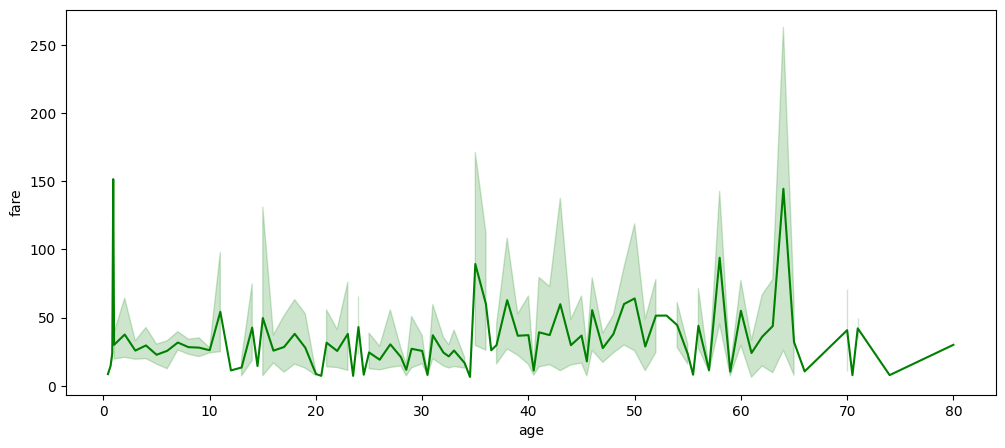

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(ax=ax, data=titanic_train, x='age', y='fare', color='g')

In [ ]:
# Pairplot

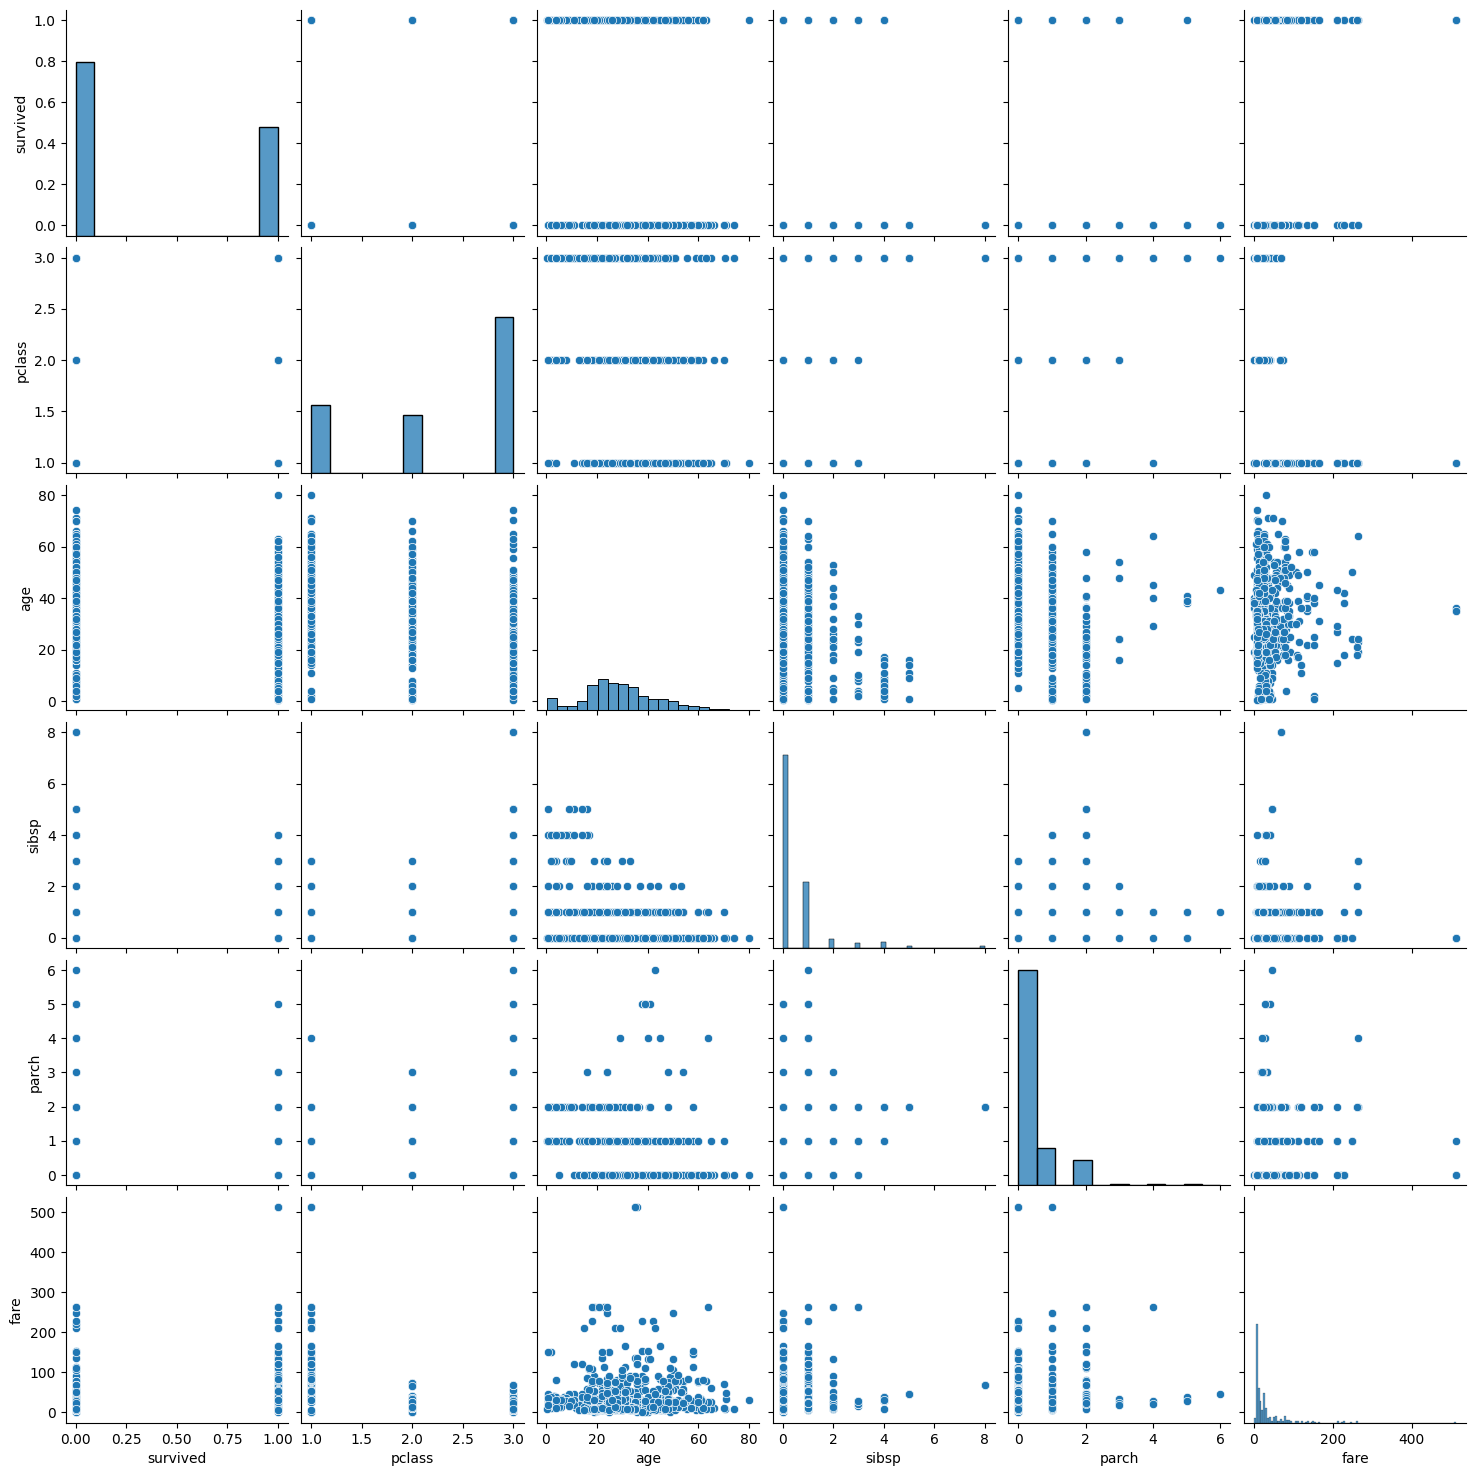

In [ ]:
sns.pairplot(titanic_train)

#### Correlation

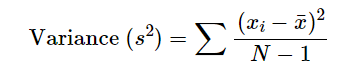

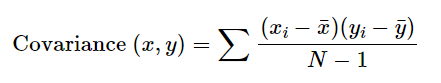

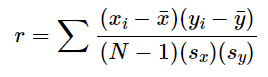

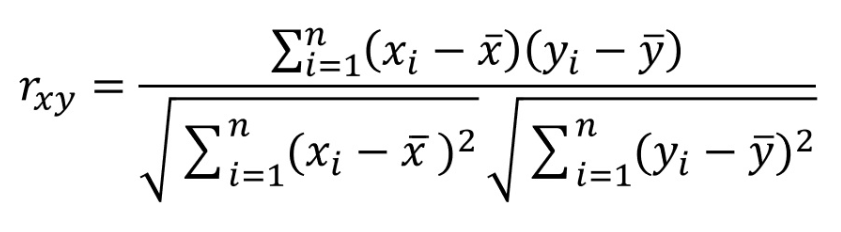

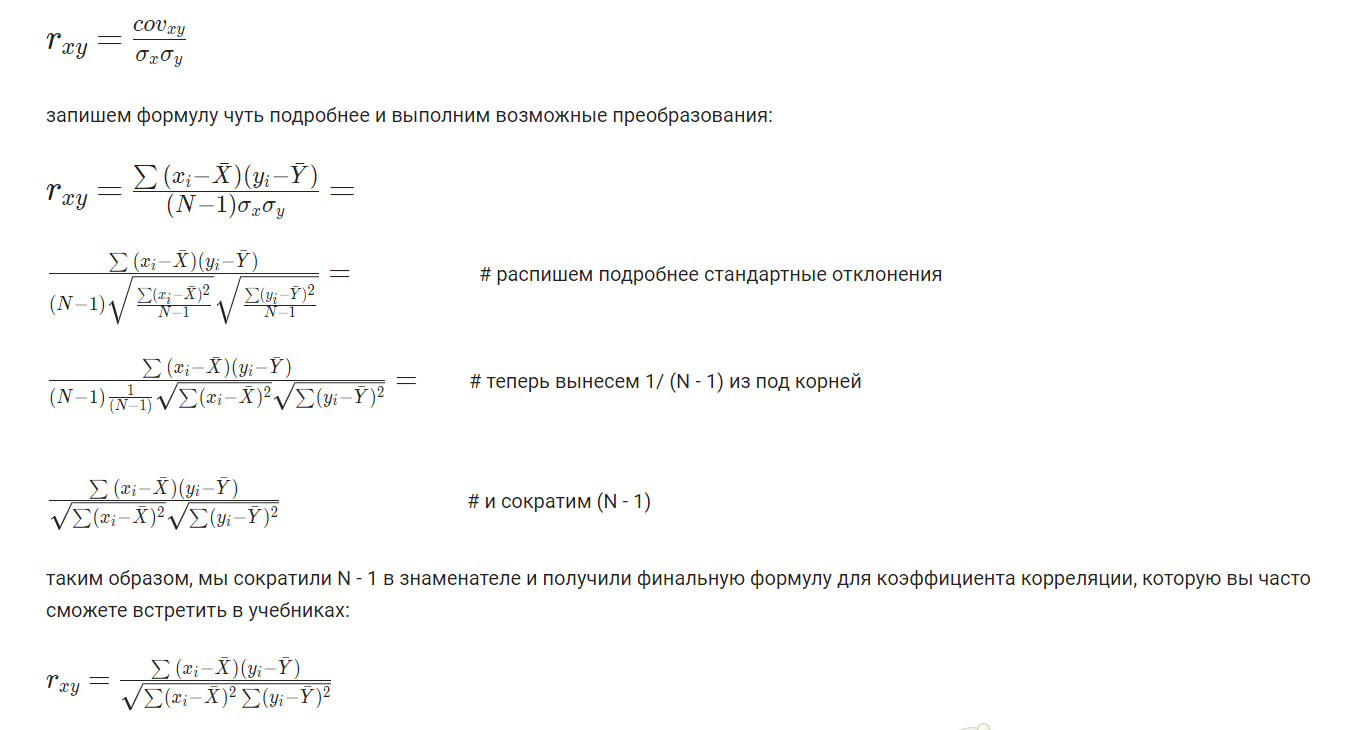

In [ ]:
def seed_everything(seed: int):
    import random, os
    import numpy as np
    #import torch

    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    #torch.manual_seed(seed)
    #torch.cuda.manual_seed(seed)
    #torch.backends.cudnn.deterministic = True
    #torch.backends.cudnn.benchmark = True

seed_everything(42)

In [ ]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

sum([(i - np.mean(X))**2 for i in X])/(len(X)-1), sum([(i - np.mean(Y))**2 for i in Y])/(len(Y))

(0.08345350380825389, 0.32809990626420293)

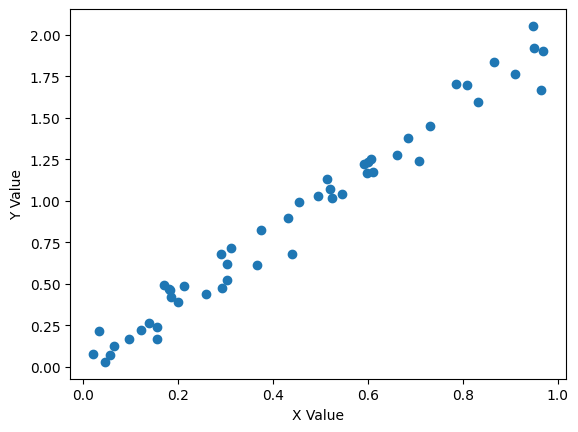

In [ ]:
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()

In [ ]:
np.var(X), np.var(Y)

(0.08178443373208878, 0.32809990626420293)

In [ ]:
def covariance(x, y):
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]

    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1

    return numerator/denominator

In [ ]:
covariance(X, Y)

0.16504237263167384

In [ ]:
np.cov(X, Y)[0, 1]

0.16281786398307782

In [ ]:
np.corrcoef(X, Y)[0, 1]

0.9873773384920709

In [ ]:
def correlation(x, y):

    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))

    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]

    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])

    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])

    denominator = (std_deviation_x*std_deviation_y)**0.5

    return numerator/denominator

In [ ]:
correlation(X, Y)

0.9812027503827643

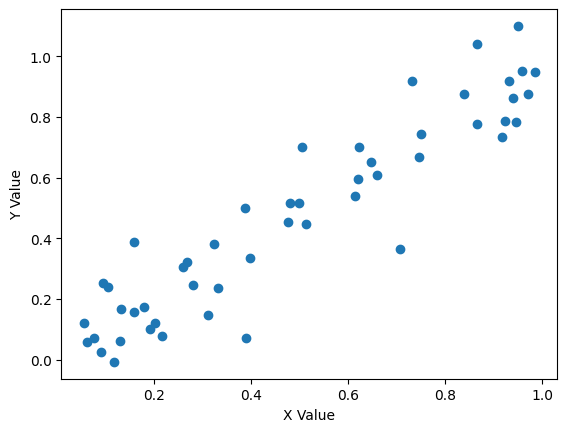

Correlation of X and Y: 0.93
Correlation of X and Y: 0.93


In [24]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])
print(f'Correlation of X and Y: {np.corrcoef(X, Y)[0, 1].round(2)}')

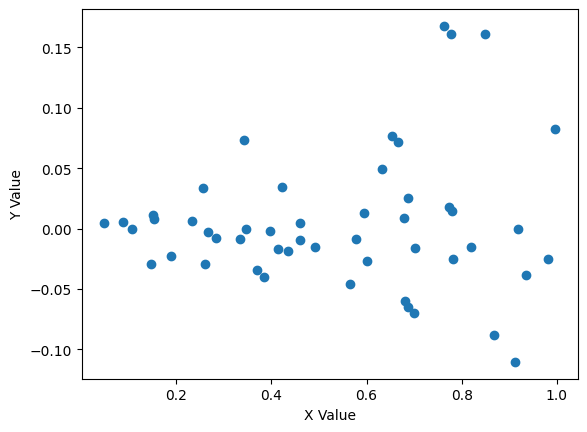

Correlation of X and Y: 0.09


In [21]:
X = np.random.rand(50)
Y = -X * np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

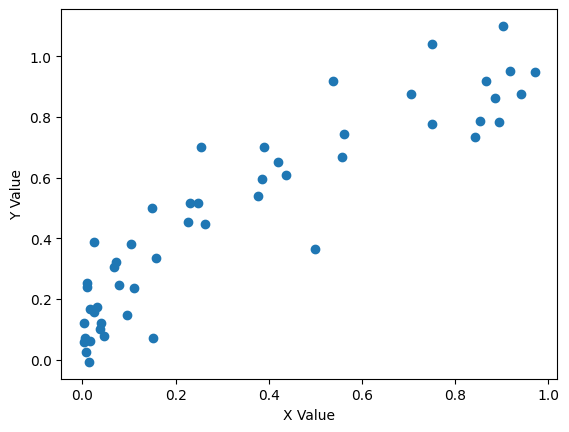

Correlation of X and Y: 0.91


In [27]:
plt.scatter(X*X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X*X, Y)[0, 1])

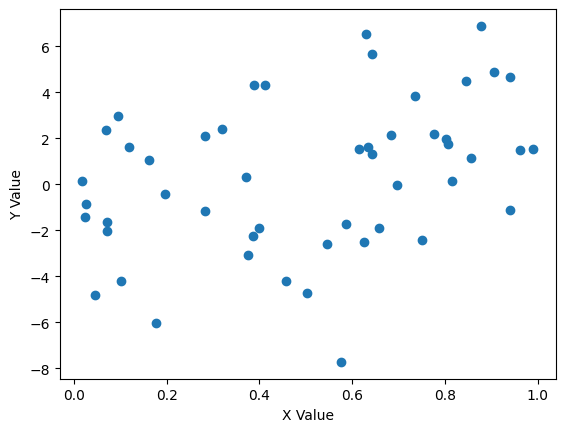

Correlation of X and Y: 0.36


In [ ]:
X = np.random.rand(50)
Y = 2 * X - np.random.normal(0.5, 4, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

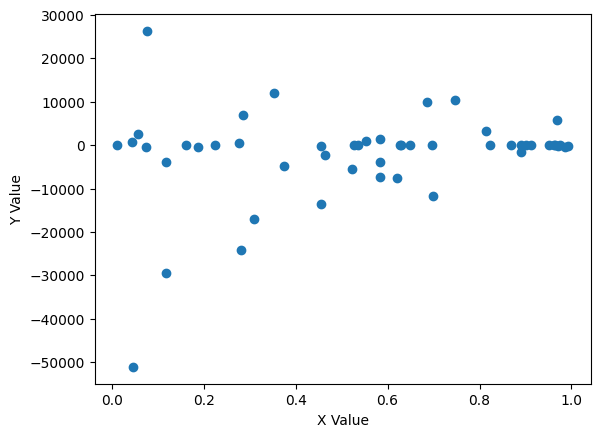

Correlation of X and Y: 0.23


In [ ]:
X = np.random.rand(50)
Y = 2 * X - np.random.normal(0.5, 4, 50)  **5

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

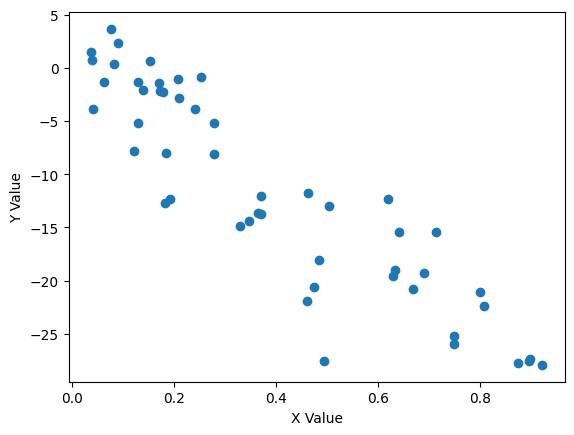

Correlation of X and Y: -0.90


In [ ]:
X = np.random.rand(50)
Y = -30 * X - np.random.normal(0.5, 4, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

In [ ]:
titanic_train.select_dtypes(include=['int64', 'float']).corr()

survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

<Axes: >

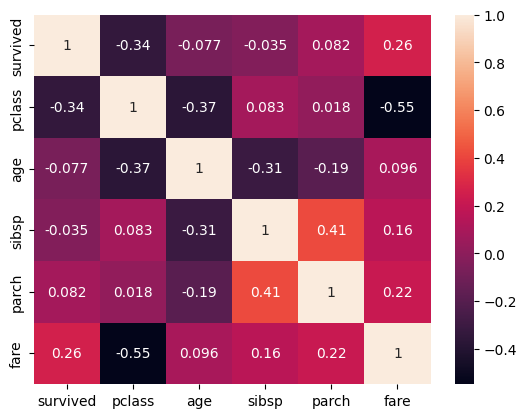

In [ ]:
sns.heatmap(titanic_train.select_dtypes(include=['int64', 'float']).corr(), annot=True)

In [ ]:
titanic_train.select_dtypes(include=['int64', 'float']).corr()['survived']['fare']

0.2573065223849626

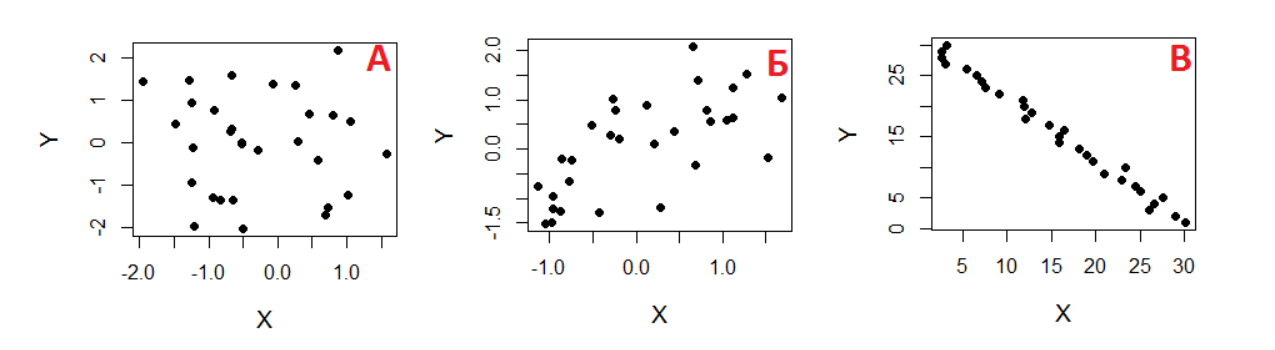

In [ ]:
x 4 5 2 3 1
y 2 1 4 3 2

-1

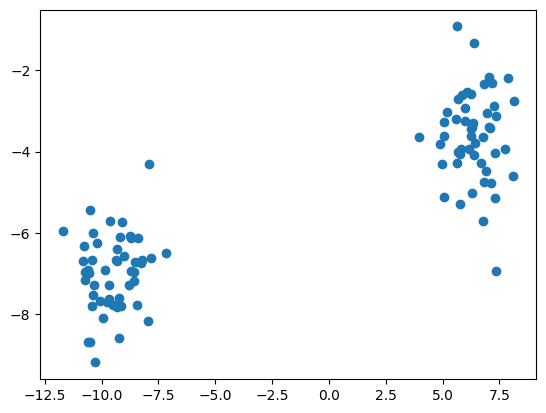

In [ ]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], marker='o',)

In [ ]:
np.corrcoef(X[:, 0], X[:, 1])[0,1]

0.8567109046089262

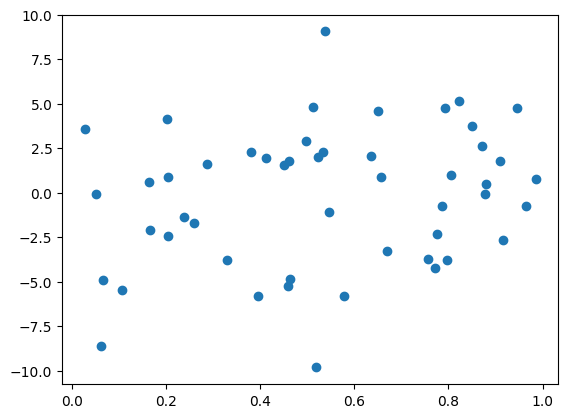

In [ ]:
X = np.random.rand(50)
Y = 2*X-np.random.normal(0.5, 4, 50)

plt.scatter(X,Y)

In [ ]:
np.corrcoef(X, Y)[0,1]

0.222450497406629

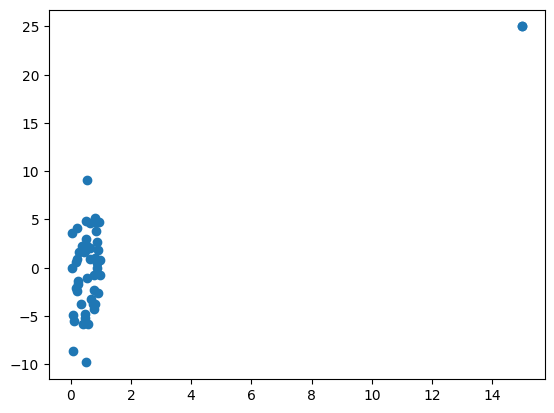

In [ ]:
X = np.concatenate([X, np.array([15])])
Y = np.concatenate([Y, np.array([25])])
plt.scatter(X,Y)

In [ ]:
np.corrcoef(X, Y)[0,1]

0.7997673373267342

In [ ]:
stats.spearmanr(X, Y)

SignificanceResult(statistic=0.30219850586979724, pvalue=0.029450728210534835)

In [ ]:
размер ноги - возраст - знания алгебры

In [ ]:
r=0.98 p_value<=0.05   5%

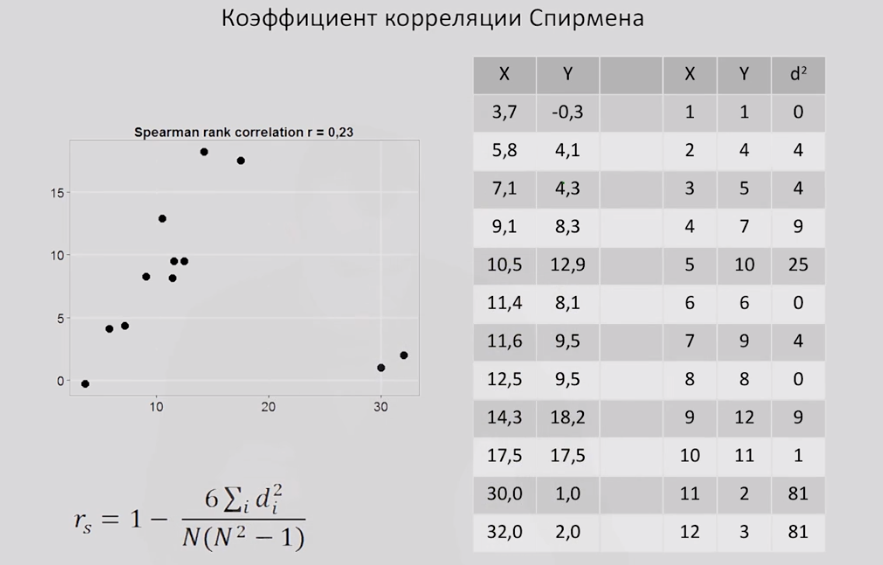

# Other

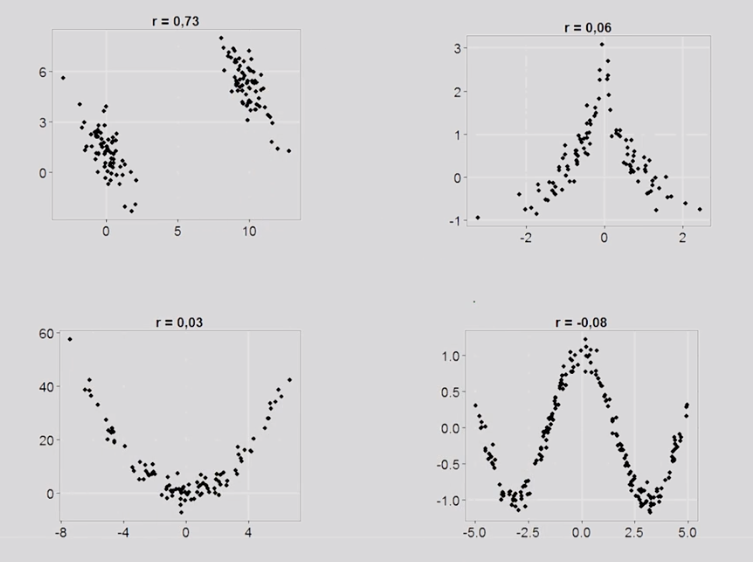

In [ ]:
some_misterious_data = titanic_train["pclass"]